
# Project Description:

The Haitian population is facing a multitude of difficulties including natural shocks as well as socio-political crises juxtaposed with conditions of chronic vulnerabilities of the population.

In 2020, 4.6 million people will need humanitarian assistance according to the humanitarian response. This number is up from 2.6 million in 2019.

Faced with these numbers, it is important that state authorities act with precision in terms of the support they provide to these people. To help them, we will analyze the different profiles of people in need of humanitarian aid. 

To do so, we will use the data found on this link https://data.humdata.org/dataset/haiti-cible-hrp-2019-2020. This data set is produced by the United Nations for the Coordination of Humanitarian Affairs (OCHA) in collaboration with humanitarian partners in Haiti. It contains estimates of people aggregated by geographic location, gender and age who have been targeted for urgent humanitarian response in Haiti.
**.

# Hypothesis: Research Question ?
 What is the question that you would like to answer in order to make a decision.

The project will show children, adults and elderly in disadvantaged situations needing humanitarian relief in terms of health and social needs such as shelter, food security, nutrition, protection, education and health. 

Knowing the importance of health and education, I could not have the luxury of remaining insensitive, seeing the children malnourished, the problem of shelter and their lack of access to education, the adults unprotected by health, food insecurity, ...

 All these situations would incite me to use my highest degree of empathy and it is for this reason that I have chosen to analyze the profile of the people urgently needing humanitarian aid in Haiti and give the State, the NGOs, the volunteers of the national territory and the diaspora, the opportunity to better target and reach the people really in need.

# I. PACKAGES

In [110]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.Collecting sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [111]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns


# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
#import plotly as pl

# data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

## 1. LOAD DATA

In [182]:
peopleinneed = pd.read_excel("haiti-ciblage-hrp-2019-2020 (1).xlsx")
peopleinneedspa = pd.read_csv("spa_boundaries_com.csv")


In [186]:

new_data = peopleinneedspa.loc[:,['ADM2_PCODE','ADM2_EN']]

In [44]:
peopleinneedspa.drop(['ADM1_EN','ADM2_EN','geometry','IHSI_UNFPA_2019_female','IHSI_UNFPA_2019_male',], axis=1, inplace=True)

In [59]:
peopleinnnedgoodspa=peopleinneedspa.round(0)

In [60]:
peopleinnnedgoodspa.head(2)

,Unnamed: 0,ADM2_PCODE,ADM1_FR,ADM2_FR,IHSI_UNFPA_2019
0,0,HT0812,Grande'Anse,Abricots,38702.00
1,1,HT0321,Nord,Acul du Nord,60759.00


In [12]:
peopleinneed.head()

,Département,Admin1_Pcode,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,HT01,Port-au-Prince,HT0111,Securite Alimentaire,7243.80,3614.66,3629.14,3549.46,3230.73,463.60
1,Ouest,HT01,Delmas,HT0112,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0
2,Ouest,HT01,Carrefour,HT0113,Securite Alimentaire,3016.75,1505.36,1511.39,1478.21,1345.47,193.07
3,Ouest,HT01,Pétion-Ville,HT0114,Securite Alimentaire,1935.81,965.97,969.84,948.55,863.37,123.89
4,Ouest,HT01,Kenscoff,HT0115,Securite Alimentaire,2871.70,1432.98,1438.72,1407.13,1280.78,183.79


# cluster preparing

In [74]:
# display fisrt five rows
data1 =pd.pivot_table(peopleinneed,index ="Admin2_Pcode",columns=['Sector'],values=["People Targeted"],aggfunc =np.mean)
cols = [col[0]+"_"+col[1] for col in data1.columns]
data1.columns =cols
data1

,People Targeted_Abris,People Targeted_Cholera,People Targeted_Education,People Targeted_Nutrition,People Targeted_Protection,People Targeted_Sante,People Targeted_Securite Alimentaire
Admin2_Pcode,,,,,,,
HT0111,0.00,7407.89,0.00,0.00,691.00,411.00,7243.80
HT0112,0.00,740.79,0.00,0.00,3247.00,583.00,0.00
HT0113,364.00,0.00,0.00,0.00,901.00,320.00,3016.75
HT0114,25883.00,0.00,0.00,0.00,2141.00,4334.00,1935.81
HT0115,0.00,0.00,0.00,0.00,0.00,35.00,2871.70
...,...,...,...,...,...,...,...
HT1023,142.00,0.00,0.00,205.00,0.00,35.00,6609.16
HT1024,976.00,0.00,0.00,100.00,42.00,439.00,4690.18
HT1025,95.00,0.00,0.00,135.00,0.00,35.00,1362.25


In [29]:
data

In [75]:
data2 =pd.pivot_table(peopleinneed,index ="Admin2_Pcode",columns=['Sector'],values=["Female"],aggfunc =np.mean)
cols = [col[0]+"_"+col[1] for col in data2.columns]
data2.columns =cols
data2

,Female_Abris,Female_Cholera,Female_Education,Female_Nutrition,Female_Protection,Female_Sante,Female_Securite Alimentaire
Admin2_Pcode,,,,,,,
HT0111,0.00,3555.79,0.00,0.00,342.00,212.00,3614.66
HT0112,0.00,355.58,0.00,0.00,1733.00,301.00,0.00
HT0113,191.00,0.00,0.00,0.00,446.00,176.00,1505.36
HT0114,13336.00,0.00,0.00,0.00,1091.00,3232.00,965.97
HT0115,0.00,0.00,0.00,0.00,0.00,18.00,1432.98
...,...,...,...,...,...,...,...
HT1023,68.00,0.00,0.00,106.60,0.00,17.00,3297.97
HT1024,461.00,0.00,0.00,52.00,21.00,246.00,2340.40
HT1025,43.00,0.00,0.00,70.20,0.00,17.00,679.76


In [76]:
data3 =pd.pivot_table(peopleinneed,index ="Admin2_Pcode",columns=['Sector'],values=["Children (<18 ans)"],aggfunc =np.mean)
cols = [col[0]+"_"+col[1] for col in data3.columns]
data3.columns =cols
data3

,Children (<18 ans)_Abris,Children (<18 ans)_Cholera,Children (<18 ans)_Education,Children (<18 ans)_Nutrition,Children (<18 ans)_Protection,Children (<18 ans)_Sante,Children (<18 ans)_Securite Alimentaire
Admin2_Pcode,,,,,,,
HT0111,0.00,2997.00,0.00,0.00,238.00,204.00,3549.46
HT0112,0.00,312.00,0.00,0.00,1282.00,289.00,0.00
HT0113,161.00,0.00,0.00,0.00,388.00,158.00,1478.21
HT0114,10738.00,0.00,0.00,0.00,731.00,2506.00,948.55
HT0115,0.00,0.00,0.00,0.00,0.00,18.00,1407.13
...,...,...,...,...,...,...,...
HT1023,54.00,0.00,0.00,205.00,0.00,14.00,3238.49
HT1024,384.00,0.00,0.00,100.00,13.00,197.00,2298.19
HT1025,37.00,0.00,0.00,135.00,0.00,14.00,667.50


In [77]:
data4 =pd.pivot_table(peopleinneed,index ="Admin2_Pcode",columns=['Sector'],values=["Adults (18-59 ans)"],aggfunc =np.mean)
cols = [col[0]+"_"+col[1] for col in data4.columns]
data4.columns =cols
data4

,Adults (18-59 ans)_Abris,Adults (18-59 ans)_Cholera,Adults (18-59 ans)_Protection,Adults (18-59 ans)_Sante,Adults (18-59 ans)_Securite Alimentaire
Admin2_Pcode,,,,,
HT0111,0.00,3937.00,448.00,181.00,3230.73
HT0112,0.00,381.00,1898.00,257.00,0.00
HT0113,180.00,0.00,502.00,144.00,1345.47
HT0114,13488.00,0.00,1384.00,1802.00,863.37
HT0115,0.00,0.00,0.00,15.00,1280.78
...,...,...,...,...,...
HT1023,79.00,0.00,0.00,19.00,2947.69
HT1024,530.00,0.00,29.00,223.00,2091.82
HT1025,52.00,0.00,0.00,19.00,607.56


In [93]:
data_final=pd.concat([data1,data2,data3,data4],axis=1)

In [94]:
data_final.head()

,People Targeted_Abris,People Targeted_Cholera,People Targeted_Education,People Targeted_Nutrition,People Targeted_Protection,People Targeted_Sante,People Targeted_Securite Alimentaire,Female_Abris,Female_Cholera,Female_Education,Female_Nutrition,Female_Protection,Female_Sante,Female_Securite Alimentaire,Children (<18 ans)_Abris,Children (<18 ans)_Cholera,Children (<18 ans)_Education,Children (<18 ans)_Nutrition,Children (<18 ans)_Protection,Children (<18 ans)_Sante,Children (<18 ans)_Securite Alimentaire,Adults (18-59 ans)_Abris,Adults (18-59 ans)_Cholera,Adults (18-59 ans)_Protection,Adults (18-59 ans)_Sante,Adults (18-59 ans)_Securite Alimentaire
Admin2_Pcode,,,,,,,,,,,,,,,,,,,,,,,,,,
HT0111,0.00,7407.89,0.00,0.00,691.00,411.00,7243.80,0.00,3555.79,0.00,0.00,342.00,212.00,3614.66,0.00,2997.00,0.00,0.00,238.00,204.00,3549.46,0.00,3937.00,448.00,181.00,3230.73
HT0112,0.00,740.79,0.00,0.00,3247.00,583.00,0.00,0.00,355.58,0.00,0.00,1733.00,301.00,0.00,0.00,312.00,0.00,0.00,1282.00,289.00,0.00,0.00,381.00,1898.00,257.00,0.00
HT0113,364.00,0.00,0.00,0.00,901.00,320.00,3016.75,191.00,0.00,0.00,0.00,446.00,176.00,1505.36,161.00,0.00,0.00,0.00,388.00,158.00,1478.21,180.00,0.00,502.00,144.00,1345.47
HT0114,25883.00,0.00,0.00,0.00,2141.00,4334.00,1935.81,13336.00,0.00,0.00,0.00,1091.00,3232.00,965.97,10738.00,0.00,0.00,0.00,731.00,2506.00,948.55,13488.00,0.00,1384.00,1802.00,863.37
HT0115,0.00,0.00,0.00,0.00,0.00,35.00,2871.70,0.00,0.00,0.00,0.00,0.00,18.00,1432.98,0.00,0.00,0.00,0.00,0.00,18.00,1407.13,0.00,0.00,0.00,15.00,1280.78


In [95]:
#normalize
data_final = (data_final-data_final.min(axis=0))/data_final.max(axis=0)
data_final

,People Targeted_Abris,People Targeted_Cholera,People Targeted_Education,People Targeted_Nutrition,People Targeted_Protection,People Targeted_Sante,People Targeted_Securite Alimentaire,Female_Abris,Female_Cholera,Female_Education,Female_Nutrition,Female_Protection,Female_Sante,Female_Securite Alimentaire,Children (<18 ans)_Abris,Children (<18 ans)_Cholera,Children (<18 ans)_Education,Children (<18 ans)_Nutrition,Children (<18 ans)_Protection,Children (<18 ans)_Sante,Children (<18 ans)_Securite Alimentaire,Adults (18-59 ans)_Abris,Adults (18-59 ans)_Cholera,Adults (18-59 ans)_Protection,Adults (18-59 ans)_Sante,Adults (18-59 ans)_Securite Alimentaire
Admin2_Pcode,,,,,,,,,,,,,,,,,,,,,,,,,,
HT0111,0.00,0.23,0.00,0.00,0.18,0.07,0.09,0.00,0.23,0.00,0.00,0.17,0.05,0.09,0.00,0.26,0.00,0.00,0.17,0.06,0.09,0.00,0.21,0.18,0.07,0.09
HT0112,0.00,0.02,0.00,0.00,0.82,0.10,0.00,0.00,0.02,0.00,0.00,0.86,0.07,0.00,0.00,0.03,0.00,0.00,0.94,0.09,0.00,0.00,0.02,0.76,0.09,0.00
HT0113,0.01,0.00,0.00,0.00,0.23,0.05,0.04,0.01,0.00,0.00,0.00,0.22,0.04,0.04,0.01,0.00,0.00,0.00,0.28,0.05,0.04,0.01,0.00,0.20,0.05,0.04
HT0114,0.43,0.00,0.00,0.00,0.54,0.72,0.02,0.43,0.00,0.00,0.00,0.54,0.80,0.02,0.43,0.00,0.00,0.00,0.53,0.79,0.02,0.43,0.00,0.55,0.66,0.02
HT0115,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT1023,0.00,0.00,0.00,0.14,0.00,0.01,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.01,0.08
HT1024,0.02,0.00,0.00,0.07,0.01,0.07,0.06,0.01,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.01,0.08,0.06
HT1025,0.00,0.00,0.00,0.09,0.00,0.01,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02


# Cluster

In [112]:
from sklearn.preprocessing import MinMaxScaler
MinMax=MinMaxScaler()


In [147]:
data=MinMax.fit_transform(data_final)
data
data = pd.DataFrame(data, columns=data_final.columns)

In [138]:
data['ADM2_code'] = data_final.index

In [124]:
data = pd.get_dummies(data,columns =['ADM2_code'],drop_first = 1)

In [139]:
data

,People Targeted_Abris,People Targeted_Cholera,People Targeted_Education,People Targeted_Nutrition,People Targeted_Protection,People Targeted_Sante,People Targeted_Securite Alimentaire,Female_Abris,Female_Cholera,Female_Education,Female_Nutrition,Female_Protection,Female_Sante,Female_Securite Alimentaire,Children (<18 ans)_Abris,Children (<18 ans)_Cholera,Children (<18 ans)_Education,Children (<18 ans)_Nutrition,Children (<18 ans)_Protection,Children (<18 ans)_Sante,Children (<18 ans)_Securite Alimentaire,Adults (18-59 ans)_Abris,Adults (18-59 ans)_Cholera,Adults (18-59 ans)_Protection,Adults (18-59 ans)_Sante,Adults (18-59 ans)_Securite Alimentaire,ADM2_code
0,0.00,0.23,0.00,0.00,0.18,0.07,0.09,0.00,0.23,0.00,0.00,0.17,0.05,0.09,0.00,0.26,0.00,0.00,0.17,0.06,0.09,0.00,0.21,0.18,0.07,0.09,HT0111
1,0.00,0.02,0.00,0.00,0.82,0.10,0.00,0.00,0.02,0.00,0.00,0.86,0.07,0.00,0.00,0.03,0.00,0.00,0.94,0.09,0.00,0.00,0.02,0.76,0.09,0.00,HT0112
2,0.01,0.00,0.00,0.00,0.23,0.05,0.04,0.01,0.00,0.00,0.00,0.22,0.04,0.04,0.01,0.00,0.00,0.00,0.28,0.05,0.04,0.01,0.00,0.20,0.05,0.04,HT0113
3,0.43,0.00,0.00,0.00,0.54,0.72,0.02,0.43,0.00,0.00,0.00,0.54,0.80,0.02,0.43,0.00,0.00,0.00,0.53,0.79,0.02,0.43,0.00,0.55,0.66,0.02,HT0114
4,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.01,0.04,HT0115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.00,0.00,0.00,0.14,0.00,0.01,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.01,0.08,HT1023
136,0.02,0.00,0.00,0.07,0.01,0.07,0.06,0.01,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.01,0.08,0.06,HT1024
137,0.00,0.00,0.00,0.09,0.00,0.01,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02,HT1025
138,0.02,0.00,0.00,0.14,0.01,0.06,0.03,0.01,0.00,0.00,0.14,0.01,0.05,0.03,0.02,0.00,0.00,0.14,0.01,0.06,0.03,0.02,0.00,0.01,0.07,0.03,HT1031


In [135]:
from sklearn.cluster import KMeans

In [149]:
distances = []
nbr_clusters = []
for k in range(1,12):
  kmean = KMeans(n_clusters=k)
  kmean.fit(data)
  nbr_clusters.append(k)
  distances.append(kmean.inertia_)


<AxesSubplot:>

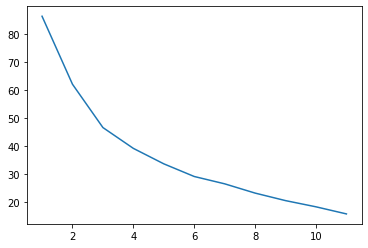

In [150]:
sns.lineplot(x=nbr_clusters,y=distances)

In [151]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(data)
labels =kmeans.labels_

In [152]:
data['labels'] = labels

In [162]:
cluster_1=data.loc[data['labels'] == 0]
cluster_2=data.loc[data['labels'] == 1]
cluster_3=data.loc[data['labels'] == 2]

In [155]:
dfcluster1 = data_final.reset_index()

In [187]:
new_data

,ADM2_PCODE,ADM2_EN
0,HT0812,Abricots
1,HT0321,Acul du Nord
2,HT0922,Anse-a-Foleur
3,HT0234,Anse-a-Pitre
4,HT1021,Anse-a-Veau
...,...,...
135,HT0753,Tiburon
136,HT0712,Torbeck
137,HT0431,Trou du Nord
138,HT0441,Vallieres


In [171]:
dfcluster1 = dfcluster1.to_frame()

In [188]:
dfcluster1 = new_data.reset_index()

In [189]:
df1 = pd.merge(cluster_1,dfcluster1, how = 'inner', left_on= cluster_1.index, right_on='index')
df2 =pd.merge(cluster_2,dfcluster1, how = 'inner', left_on= cluster_2.index, right_on='index')
df3 = pd.merge(cluster_3,dfcluster1, how = 'inner', left_on= cluster_3.index, right_on='index')

In [220]:
df1

,People Targeted_Abris,People Targeted_Cholera,People Targeted_Education,People Targeted_Nutrition,People Targeted_Protection,People Targeted_Sante,People Targeted_Securite Alimentaire,Female_Abris,Female_Cholera,Female_Education,Female_Nutrition,Female_Protection,Female_Sante,Female_Securite Alimentaire,Children (<18 ans)_Abris,Children (<18 ans)_Cholera,Children (<18 ans)_Education,Children (<18 ans)_Nutrition,Children (<18 ans)_Protection,Children (<18 ans)_Sante,Children (<18 ans)_Securite Alimentaire,Adults (18-59 ans)_Abris,Adults (18-59 ans)_Cholera,Adults (18-59 ans)_Protection,Adults (18-59 ans)_Sante,Adults (18-59 ans)_Securite Alimentaire,labels,index,ADM2_PCODE,ADM2_EN
0,0.00,0.23,0.00,0.00,0.18,0.07,0.09,0.00,0.23,0.00,0.00,0.17,0.05,0.09,0.00,0.26,0.00,0.00,0.17,0.06,0.09,0.00,0.21,0.18,0.07,0.09,0,0,HT0812,Abricots
1,0.00,0.02,0.00,0.00,0.82,0.10,0.00,0.00,0.02,0.00,0.00,0.86,0.07,0.00,0.00,0.03,0.00,0.00,0.94,0.09,0.00,0.00,0.02,0.76,0.09,0.00,0,1,HT0321,Acul du Nord
2,0.01,0.00,0.00,0.00,0.23,0.05,0.04,0.01,0.00,0.00,0.00,0.22,0.04,0.04,0.01,0.00,0.00,0.00,0.28,0.05,0.04,0.01,0.00,0.20,0.05,0.04,0,2,HT0922,Anse-a-Foleur
3,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.01,0.04,0,4,HT1021,Anse-a-Veau
4,0.06,0.09,0.00,0.00,0.09,0.12,0.03,0.05,0.09,0.00,0.00,0.09,0.12,0.03,0.07,0.12,0.00,0.00,0.10,0.14,0.03,0.05,0.07,0.08,0.10,0.03,0,5,HT0151,Anse a Galets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.00,0.00,0.00,0.14,0.00,0.01,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00,0.00,0.01,0.08,0,135,HT0753,Tiburon
112,0.02,0.00,0.00,0.07,0.01,0.07,0.06,0.01,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.00,0.07,0.01,0.06,0.06,0.02,0.00,0.01,0.08,0.06,0,136,HT0712,Torbeck
113,0.00,0.00,0.00,0.09,0.00,0.01,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.09,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02,0,137,HT0431,Trou du Nord
114,0.02,0.00,0.00,0.14,0.01,0.06,0.03,0.01,0.00,0.00,0.14,0.01,0.05,0.03,0.02,0.00,0.00,0.14,0.01,0.06,0.03,0.02,0.00,0.01,0.07,0.03,0,138,HT0441,Vallieres


# DATA CLEANING

In [ ]:
Profil1

In [ ]:
data_final
c = peopleinneedgood.drop(['Admin2_Pcode','Commune'],axis = 1)

In [211]:
#c = c.round(0)

In [54]:
peopleinneedgood['Elderly (>59 ans)'] = peopleinneedgood['Elderly (>59 ans)'].apply(lambda x: 0 if x =='                     -  ' else x)

In [57]:
peopleinneedgood['Elderly (>59 ans)'] = peopleinneedgood['Elderly (>59 ans)'].apply(lambda x: float(x))

In [229]:
peopleinneedgoodmerge['Elderly (>59 ans)'] = peopleinneedgoodmerge['Elderly (>59 ans)'].apply(lambda x: 0 if x =='                     -  ' else x)

In [230]:
peopleinneedgoodmerge['Elderly (>59 ans)'] = peopleinneedgoodmerge['Elderly (>59 ans)'].apply(lambda x: 0 if x =='                     -  ' else x)

In [200]:
peopleinnnedgoodspa

,Unnamed: 0,ADM2_PCODE,ADM1_FR,ADM2_FR,IHSI_UNFPA_2019
0,0,HT0812,Grande'Anse,Abricots,38702.00
1,1,HT0321,Nord,Acul du Nord,60759.00
2,2,HT0922,Nord-Ouest,Anse-à-Foleur,36012.00
3,3,HT0234,Sud-Est,Anse-à-Pître,42597.00
4,4,HT1021,Nippes,Anse-à-Veau,35556.00
...,...,...,...,...,...
135,135,HT0753,Sud,Tiburon,23763.00
136,136,HT0712,Sud,Torbeck,77664.00
137,137,HT0431,Nord-Est,Trou du Nord,55200.00
138,138,HT0441,Nord-Est,Vallières,26553.00


,Département,Admin1_Pcode,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,HT01,Port-au-Prince,HT0111,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60
1,Ouest,HT01,Delmas,HT0112,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00
2,Ouest,HT01,Carrefour,HT0113,Securite Alimentaire,3017.00,1505.00,1511.00,1478.00,1345.00,193.07
3,Ouest,HT01,Pétion-Ville,HT0114,Securite Alimentaire,1936.00,966.00,970.00,949.00,863.00,123.89
4,Ouest,HT01,Kenscoff,HT0115,Securite Alimentaire,2872.00,1433.00,1439.00,1407.00,1281.00,183.79
...,...,...,...,...,...,...,...,...,...,...,...
1115,Nippes,HT10,L'Asile,HT1023,Education,0.00,0.00,0.00,0.00,NaN,NaN
1116,Nippes,HT10,Arnaud,HT1024,Education,0.00,0.00,0.00,0.00,NaN,NaN
1117,Nippes,HT10,Plaisance du Sud,HT1025,Education,0.00,0.00,0.00,0.00,NaN,NaN
1118,Nippes,HT10,Baradères,HT1031,Education,0.00,0.00,0.00,0.00,NaN,NaN


# Merge

In [202]:
peopleinneedgoodmerge=pd.merge(left=peopleinneedgood, right=peopleinnnedgoodspa, how = 'inner',left_on='Admin2_Pcode', right_on='ADM2_PCODE')

In [203]:
peopleinneedgoodmerge

,Département,Admin1_Pcode,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Unnamed: 0,ADM2_PCODE,ADM1_FR,ADM2_FR,IHSI_UNFPA_2019
0,Ouest,HT01,Port-au-Prince,HT0111,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60,111,HT0111,Ouest,Port-au-Prince,1227540.00
1,Ouest,HT01,Port-au-Prince,HT0111,Protection,691.00,342.00,349.00,238.00,448.00,5.00,111,HT0111,Ouest,Port-au-Prince,1227540.00
2,Ouest,HT01,Port-au-Prince,HT0111,Nutrition,0.00,0.00,0.00,0.00,NaN,NaN,111,HT0111,Ouest,Port-au-Prince,1227540.00
3,Ouest,HT01,Port-au-Prince,HT0111,Sante,411.00,212.00,199.00,204.00,181.00,26.00,111,HT0111,Ouest,Port-au-Prince,1227540.00
4,Ouest,HT01,Port-au-Prince,HT0111,Cholera,7408.00,3556.00,3852.00,2997.00,3937.00,474.00,111,HT0111,Ouest,Port-au-Prince,1227540.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nippes,HT10,Grand-Boucan,HT1032,Sante,18.00,9.00,9.00,7.00,10.00,1.00,58,HT1032,Nippes,Grand-Boucan,5973.00
1116,Nippes,HT10,Grand-Boucan,HT1032,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,58,HT1032,Nippes,Grand-Boucan,5973.00
1117,Nippes,HT10,Grand-Boucan,HT1032,Abris,20.00,9.00,11.00,9.00,10.00,1.00,58,HT1032,Nippes,Grand-Boucan,5973.00
1118,Nippes,HT10,Grand-Boucan,HT1032,Abris,20.00,9.00,11.00,9.00,10.00,1.00,58,HT1032,Nippes,Grand-Boucan,5973.00


## Overview

In [10]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(peopleinneedgood, message):
     print(f'{message}:\n')
     print('Number of observations: ', peopleinneed.shape[0])
     print("\nNumber of features:", peopleinneed.shape[1])
     print("\nData Features:")
     print("\nMissing values:", peopleinneed.isnull().sum().values.sum())
     print("\nUnique values:")
     print(peopleinneed.nunique())

In [139]:
# showing overview
dataoveriew(peopleinneedgood, 'Overview of the dataset')

Overview of the dataset:

Number of observations:  1120

Number of features: 11

Data Features:

Missing values: 560

Unique values:
Département            10
Admin1_Pcode           10
Commune               140
Admin2_Pcode          140
Sector                  7
People Targeted       472
Female                484
Male                  472
Children (<18 ans)    475
Adults (18-59 ans)    445
Elderly (>59 ans)     290
dtype: int64


# EDA

In [206]:
peopleinneedgood

,Département,Admin1_Pcode,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,HT01,Port-au-Prince,HT0111,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60
1,Ouest,HT01,Delmas,HT0112,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00
2,Ouest,HT01,Carrefour,HT0113,Securite Alimentaire,3017.00,1505.00,1511.00,1478.00,1345.00,193.07
3,Ouest,HT01,Pétion-Ville,HT0114,Securite Alimentaire,1936.00,966.00,970.00,949.00,863.00,123.89
4,Ouest,HT01,Kenscoff,HT0115,Securite Alimentaire,2872.00,1433.00,1439.00,1407.00,1281.00,183.79
...,...,...,...,...,...,...,...,...,...,...,...
1115,Nippes,HT10,L'Asile,HT1023,Education,0.00,0.00,0.00,0.00,NaN,NaN
1116,Nippes,HT10,Arnaud,HT1024,Education,0.00,0.00,0.00,0.00,NaN,NaN
1117,Nippes,HT10,Plaisance du Sud,HT1025,Education,0.00,0.00,0.00,0.00,NaN,NaN
1118,Nippes,HT10,Baradères,HT1031,Education,0.00,0.00,0.00,0.00,NaN,NaN


In [207]:
peopleinneedgroupdata = peopleinneedgood.groupby(['Département','Sector']).sum()

In [208]:
peopleinneedgroupdata = peopleinneedgroupdata.reset_index(level = 1)

In [209]:
peopleinneedgroupdata=peopleinneedgroupdata.fillna(0)

In [210]:
peopleinneedgroupdata

,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
Département,,,,,,,
Artibonite,Abris,137180.00,70682.00,66498.00,56912.00,71486.00,8782.11
Artibonite,Cholera,96620.00,46378.00,50243.00,37243.00,53191.00,6187.00
Artibonite,Education,9665.00,4736.00,4929.00,9665.00,0.00,0.00
Artibonite,Nutrition,2670.00,1388.00,1282.00,2670.00,0.00,0.00
Artibonite,Protection,340.00,170.00,170.00,105.00,235.00,0.00
...,...,...,...,...,...,...,...
Sud-Est,Education,15755.00,7840.00,7915.00,15755.00,0.00,0.00
Sud-Est,Nutrition,750.00,389.00,361.00,750.00,0.00,0.00
Sud-Est,Protection,1572.00,786.00,786.00,532.00,1003.00,37.00


In [42]:
a = peopleinneedgood.drop('Département',axis=1).groupby(['Commune','Sector']).sum()

In [43]:
a

People Targeted  Female    Male  Children (<18 ans)  Adults (18-59 ans)  Elderly (>59 ans)
Commune     Sector                                                                                                          
Abricots    Abris                         7362.00 3468.00 3894.00             3234.00             3656.00             472.00
            Cholera                          0.00    0.00    0.00                0.00                0.00               0.00
            Education                        0.00    0.00    0.00                0.00                0.00               0.00
            Nutrition                      175.00   91.00   84.00              175.00                0.00               0.00
            Protection                     166.00   83.00   83.00               55.00              111.00               0.00
...                                           ...     ...     ...                 ...                 ...                ...
Île à Vache Education                        0.00    0.00    0.00                0.00                0.00               0.00
            Nutrition                       60.00   31.00   29.00               60.00                0.00               0.00
            Protection                      88.00   44.00   44.00               29.00               59.00               0.00
            Sante                          537.00  398.00  139.00              319.00              218.00               0.00
            Securite Alimentaire          1540.00  768.00  771.00              755.00              687.00              98.55

[980 rows x 6 columns]

In [231]:
b= peopleinneedgoodmerge.groupby(['Département','Sector']).sum()

In [232]:
b = b.reset_index(level = 1)

In [233]:
b

,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Unnamed: 0,IHSI_UNFPA_2019
Département,,,,,,,,,
Artibonite,Abris,137180.00,70682.00,66498.00,56912.00,71486.00,8782.11,2362,4094302.00
Artibonite,Cholera,96620.00,46378.00,50243.00,37243.00,53191.00,6187.00,1181,2047151.00
Artibonite,Education,9665.00,4736.00,4929.00,9665.00,0.00,0.00,1181,2047151.00
Artibonite,Nutrition,2670.00,1388.00,1282.00,2670.00,0.00,0.00,1181,2047151.00
Artibonite,Protection,340.00,170.00,170.00,105.00,235.00,0.00,1181,2047151.00
...,...,...,...,...,...,...,...,...,...
Sud-Est,Education,15755.00,7840.00,7915.00,15755.00,0.00,0.00,533,893900.00
Sud-Est,Nutrition,750.00,389.00,361.00,750.00,0.00,0.00,533,893900.00
Sud-Est,Protection,1572.00,786.00,786.00,532.00,1003.00,37.00,533,893900.00


In [45]:
a = a.reset_index(level = 1)

## Depart

In [213]:
list_depart = peopleinneedgood['Département'].unique()

In [214]:
list_depart

array(['Ouest', 'Sud-Est', 'Nord', 'Nord-Est', 'Artibonite', 'Centre',
       'Sud', "Grande'Anse", 'Nord-Ouest', 'Nippes'], dtype=object)

In [235]:
list_depart = peopleinneedgoodmerge['Département'].unique()

In [142]:
list_Com = peopleinneedgood['Commune'].unique()

In [22]:
list_Com

array(['Port-au-Prince', 'Delmas', 'Carrefour', 'Pétion-Ville',
       'Kenscoff', 'Gressier', 'Cité Soleil', 'Tabarre', 'Léogâne',
       'Petit-Goâve', 'Grand-Goâve', 'Croix-Des-Bouquets', 'Thomazeau',
       'Ganthier', 'Cornillon / Grand Bois', 'Fonds-Verrettes',
       'Arcahaie', 'Cabaret', 'Anse à Galets', 'Pointe à Raquette',
       'Jacmel', 'Marigot', 'Cayes-Jacmel', 'La Vallée', 'Bainet',
       'Côtes de Fer', 'Belle Anse', 'Grand Gosier', 'Thiotte',
       'Anse-à-Pître', 'Cap-Haïtien', 'Quartier Morin', 'Limonade',
       'Acul du Nord', 'Plaine du Nord', 'Milot',
       'Grande Riviere Du Nord', 'Bahon', 'Saint-Raphaël', 'Dondon',
       'Ranquitte', 'Pignon', 'La Victoire', 'Borgne', 'Port-Margot',
       'Limbé', 'Bas Limbé', 'Plaisance', 'Pilate', 'Fort-Liberté',
       'Ferrier', 'Perches', 'Ouanaminthe', 'Capotille', 'Mont-Organisé',
       'Trou du Nord', 'Sainte Suzanne', 'Terrier Rouge', 'Caracol',
       'Vallières', 'Carice', 'Mombin Crochu', 'Gonaïves', 'Enner

# (echantillon en fonction des personnes cibles) % besoin d'aides humanitaires par Departement (Genre, Profil)

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Ouest,Abris,209412.00,103146.00,106266.00,95842.00,100166.00,13404.00,0.31,45.77,47.83,6.40
Ouest,Cholera,76831.00,39952.00,36879.00,35929.00,35983.00,4916.00,0.11,46.76,46.83,6.40
Ouest,Education,3966.00,2538.00,1428.00,3966.00,0.00,0.00,0.01,100.00,0.00,0.00
Ouest,Nutrition,7170.00,3442.00,3728.00,7170.00,0.00,0.00,0.01,100.00,0.00,0.00
Ouest,Protection,18764.00,9179.00,9585.00,6926.00,11462.00,376.00,0.03,36.91,61.09,2.00
Ouest,Sante,29994.00,8769.00,21225.00,17333.00,12242.00,419.00,0.04,57.79,40.81,1.40
Ouest,Securite Alimentaire,331533.00,166096.00,165434.00,162450.00,147862.00,21218.07,0.49,49.00,44.60,6.40


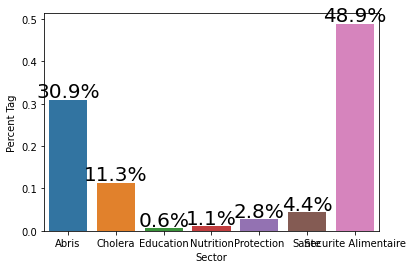

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Sud-Est,Abris,43456.00,21660.00,21796.00,16632.00,24040.00,2784.00,0.17,38.27,55.32,6.41
Sud-Est,Cholera,1376.00,715.00,661.00,620.00,667.00,89.00,0.01,45.06,48.47,6.47
Sud-Est,Education,15755.00,7915.00,7840.00,15755.00,0.00,0.00,0.06,100.00,0.00,0.00
Sud-Est,Nutrition,750.00,361.00,389.00,750.00,0.00,0.00,0.00,100.00,0.00,0.00
Sud-Est,Protection,1572.00,786.00,786.00,532.00,1003.00,37.00,0.01,33.84,63.80,2.35
Sud-Est,Sante,5535.00,1788.00,3747.00,2821.00,2590.00,124.00,0.02,50.97,46.79,2.24
Sud-Est,Securite Alimentaire,184590.00,92480.00,92112.00,90451.00,82327.00,11813.79,0.73,49.00,44.60,6.40


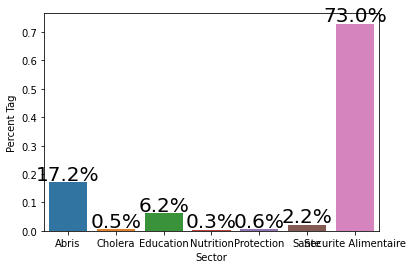

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Nord,Abris,3580.00,1732.00,1848.00,1486.00,1868.00,229.19,0.02,41.51,52.18,6.40
Nord,Cholera,31855.00,16565.00,15291.00,15542.00,14275.00,2039.00,0.22,48.79,44.81,6.40
Nord,Education,7249.00,3697.00,3552.00,7249.00,0.00,0.00,0.05,100.00,0.00,0.00
Nord,Nutrition,3618.00,1736.00,1882.00,3618.00,0.00,0.00,0.02,100.00,0.00,0.00
Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Nord,Sante,19762.00,4829.00,14933.00,11761.00,7962.00,39.00,0.14,59.51,40.29,0.20
Nord,Securite Alimentaire,79813.00,39988.00,39827.00,39109.00,35596.00,5108.10,0.55,49.00,44.60,6.40


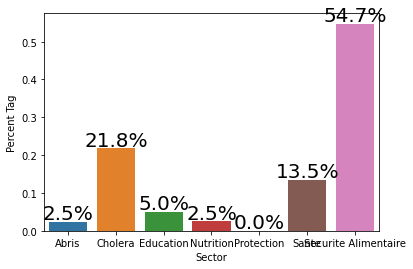

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Nord-Est,Abris,32824.00,16294.00,16530.00,13668.00,17056.00,2100.00,0.37,41.64,51.96,6.40
Nord-Est,Cholera,847.00,440.00,407.00,394.00,399.00,55.00,0.01,46.52,47.11,6.49
Nord-Est,Education,2644.00,1692.00,952.00,2644.00,0.00,0.00,0.03,100.00,0.00,0.00
Nord-Est,Nutrition,365.00,176.00,189.00,365.00,0.00,0.00,0.00,100.00,0.00,0.00
Nord-Est,Protection,2705.00,1357.00,1348.00,953.00,1615.00,137.00,0.03,35.23,59.70,5.06
Nord-Est,Sante,11783.00,2996.00,8787.00,6817.00,4925.00,41.00,0.13,57.85,41.80,0.35
Nord-Est,Securite Alimentaire,37603.00,18838.00,18765.00,18426.00,16769.00,2406.64,0.42,49.00,44.59,6.40


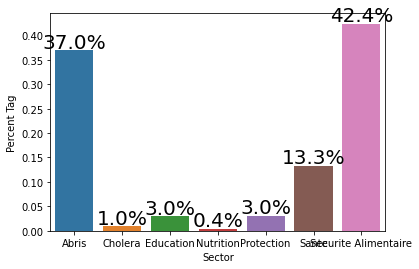

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Artibonite,Abris,137180.00,66498.00,70682.00,56912.00,71486.00,8782.11,0.43,41.49,52.11,6.40
Artibonite,Cholera,96620.00,50243.00,46378.00,37243.00,53191.00,6187.00,0.30,38.55,55.05,6.40
Artibonite,Education,9665.00,4929.00,4736.00,9665.00,0.00,0.00,0.03,100.00,0.00,0.00
Artibonite,Nutrition,2670.00,1282.00,1388.00,2670.00,0.00,0.00,0.01,100.00,0.00,0.00
Artibonite,Protection,340.00,170.00,170.00,105.00,235.00,0.00,0.00,30.88,69.12,0.00
Artibonite,Sante,5629.00,2503.00,3126.00,2364.00,2974.00,291.00,0.02,42.00,52.83,5.17
Artibonite,Securite Alimentaire,65606.00,32870.00,32737.00,32148.00,29259.00,4198.78,0.21,49.00,44.60,6.40


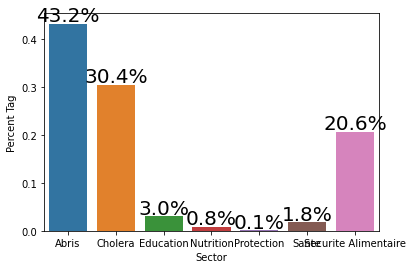

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Centre,Abris,41810.00,21448.00,20362.00,17116.00,22020.00,2674.00,0.21,40.94,52.67,6.40
Centre,Cholera,89213.00,46390.00,42822.00,37524.00,45978.00,5709.00,0.44,42.06,51.54,6.40
Centre,Education,3525.00,2256.00,1269.00,3525.00,0.00,0.00,0.02,100.00,0.00,0.00
Centre,Nutrition,390.00,187.00,203.00,390.00,0.00,0.00,0.00,100.00,0.00,0.00
Centre,Protection,4013.00,2040.00,1973.00,1607.00,2207.00,199.00,0.02,40.04,55.00,4.96
Centre,Sante,6624.00,1949.00,4675.00,3717.00,2831.00,76.00,0.03,56.11,42.74,1.15
Centre,Securite Alimentaire,56608.00,28361.00,28248.00,27738.00,25248.00,3622.92,0.28,49.00,44.60,6.40


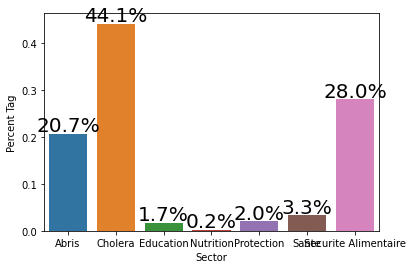

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Sud,Abris,149664.00,77020.00,72644.00,58074.00,82012.00,9578.00,0.59,38.80,54.80,6.40
Sud,Cholera,1482.00,770.00,712.00,559.00,827.00,96.00,0.01,37.72,55.80,6.48
Sud,Education,19281.00,9655.00,9626.00,19281.00,0.00,0.00,0.08,100.00,0.00,0.00
Sud,Nutrition,1880.00,903.00,977.00,1880.00,0.00,0.00,0.01,100.00,0.00,0.00
Sud,Protection,3344.00,1672.00,1672.00,1026.00,2318.00,0.00,0.01,30.68,69.32,0.00
Sud,Sante,25610.00,7582.00,18028.00,13855.00,11448.00,307.00,0.10,54.10,44.70,1.20
Sud,Securite Alimentaire,50388.00,25245.00,25145.00,24693.00,22472.00,3224.83,0.20,49.01,44.60,6.40


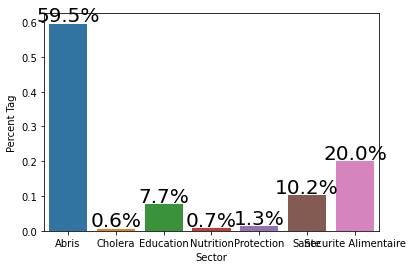

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Grande'Anse,Abris,44596.00,23334.00,21262.00,17856.00,23884.00,2856.08,0.25,40.04,53.56,6.40
Grande'Anse,Cholera,212.00,110.00,102.00,86.00,112.00,14.00,0.00,40.57,52.83,6.60
Grande'Anse,Education,11569.00,5606.00,5963.00,11569.00,0.00,0.00,0.06,100.00,0.00,0.00
Grande'Anse,Nutrition,1015.00,487.00,528.00,1015.00,0.00,0.00,0.01,100.00,0.00,0.00
Grande'Anse,Protection,962.00,481.00,481.00,306.00,656.00,0.00,0.01,31.81,68.19,0.00
Grande'Anse,Sante,22581.00,8247.00,14334.00,11429.00,10546.00,606.00,0.12,50.61,46.70,2.68
Grande'Anse,Securite Alimentaire,100870.00,50536.00,50335.00,49426.00,44987.00,6455.70,0.55,49.00,44.60,6.40


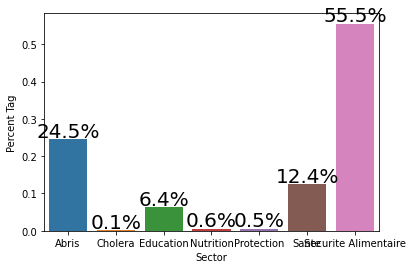

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Nord-Ouest,Abris,17530.00,8542.00,8988.00,6922.00,9424.00,1178.49,0.10,39.49,53.76,6.72
Nord-Ouest,Cholera,34817.00,18105.00,16712.00,14494.00,18092.00,2229.00,0.20,41.63,51.96,6.40
Nord-Ouest,Education,4832.00,2465.00,2368.00,4832.00,0.00,0.00,0.03,100.00,0.00,0.00
Nord-Ouest,Nutrition,190.00,91.00,99.00,190.00,0.00,0.00,0.00,100.00,0.00,0.00
Nord-Ouest,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Nord-Ouest,Sante,720.00,355.00,365.00,297.00,377.00,46.00,0.00,41.25,52.36,6.39
Nord-Ouest,Securite Alimentaire,118065.00,59151.00,58915.00,57853.00,52658.00,7556.22,0.67,49.00,44.60,6.40


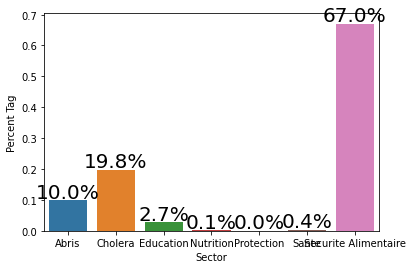

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Département,,,,,,,,,,,
Nippes,Abris,33826.00,17638.00,16188.00,13076.00,18588.00,2162.00,0.32,38.66,54.95,6.39
Nippes,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Nippes,Education,8814.00,4371.00,4443.00,8814.00,0.00,0.00,0.08,100.00,0.00,0.00
Nippes,Nutrition,1460.00,700.00,760.00,1460.00,0.00,0.00,0.01,100.00,0.00,0.00
Nippes,Protection,734.00,367.00,367.00,225.00,509.00,0.00,0.01,30.65,69.35,0.00
Nippes,Sante,3431.00,1149.00,2282.00,1770.00,1591.00,70.00,0.03,51.59,46.37,2.04
Nippes,Securite Alimentaire,57188.00,28651.00,28537.00,28023.00,25508.00,3660.03,0.54,49.00,44.60,6.40


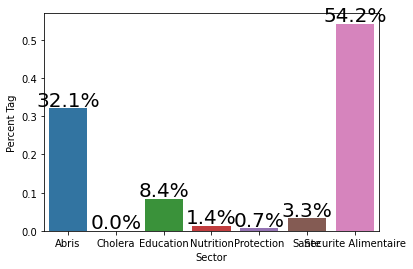

In [216]:
for i  in list_depart :
    art = peopleinneedgroupdata[peopleinneedgroupdata.index == i][['Sector','People Targeted','Male','Female','Children (<18 ans)','Adults (18-59 ans)','Elderly (>59 ans)']] 
    art['Percent Tag'] = art['People Targeted'] / (art['People Targeted'].sum())
    art['percent Child'] = (art['Children (<18 ans)'] / (art['People Targeted'].sum())) *100 / art['Percent Tag']
    art['percent Adults'] = (art['Adults (18-59 ans)'] / (art['People Targeted'].sum()) )*100 / art['Percent Tag']
    art['Percent Elderly'] = (art['Elderly (>59 ans)'] / (art['People Targeted'].sum())) *100 / art['Percent Tag']
    display(art)
    ax = sns.barplot(data= art, x = 'Sector', y = 'Percent Tag')
    for bar in ax.patches:
        ax.annotate('{:.1f}%'.format(bar.get_height()*100),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=20, xytext=(0, 8),
                    textcoords='offset points')
    plt.show()

In [18]:
list_Com = peopleinneedgood['Commune'].unique()

In [20]:
a[a['Sector'='Securite Alimentaire']]

,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans)
Commune,,,,,,
Abricots,Abris,7362.00,3468.00,3894.00,3234.00,3656.00
Abricots,Cholera,0.00,0.00,0.00,0.00,0.00
Abricots,Education,0.00,0.00,0.00,0.00,0.00
Abricots,Nutrition,175.00,91.00,84.00,175.00,0.00
Abricots,Protection,166.00,83.00,83.00,55.00,111.00
...,...,...,...,...,...,...
Île à Vache,Education,0.00,0.00,0.00,0.00,0.00
Île à Vache,Nutrition,60.00,31.00,29.00,60.00,0.00
Île à Vache,Protection,88.00,44.00,44.00,29.00,59.00


In [23]:
a

,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans)
Commune,,,,,,
Abricots,Abris,7362.00,3468.00,3894.00,3234.00,3656.00
Abricots,Cholera,0.00,0.00,0.00,0.00,0.00
Abricots,Education,0.00,0.00,0.00,0.00,0.00
Abricots,Nutrition,175.00,91.00,84.00,175.00,0.00
Abricots,Protection,166.00,83.00,83.00,55.00,111.00
...,...,...,...,...,...,...
Île à Vache,Education,0.00,0.00,0.00,0.00,0.00
Île à Vache,Nutrition,60.00,31.00,29.00,60.00,0.00
Île à Vache,Protection,88.00,44.00,44.00,29.00,59.00


In [49]:
peopleinneedgood['Département']

,Département,Admin1_Pcode,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,HT01,Port-au-Prince,HT0111,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60
1,Ouest,HT01,Delmas,HT0112,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00
2,Ouest,HT01,Carrefour,HT0113,Securite Alimentaire,3017.00,1505.00,1511.00,1478.00,1345.00,193.07
3,Ouest,HT01,Pétion-Ville,HT0114,Securite Alimentaire,1936.00,966.00,970.00,949.00,863.00,123.89
4,Ouest,HT01,Kenscoff,HT0115,Securite Alimentaire,2872.00,1433.00,1439.00,1407.00,1281.00,183.79
...,...,...,...,...,...,...,...,...,...,...,...
1115,Nippes,HT10,L'Asile,HT1023,Education,0.00,0.00,0.00,0.00,0.00,0.00
1116,Nippes,HT10,Arnaud,HT1024,Education,0.00,0.00,0.00,0.00,0.00,0.00
1117,Nippes,HT10,Plaisance du Sud,HT1025,Education,0.00,0.00,0.00,0.00,0.00,0.00
1118,Nippes,HT10,Baradères,HT1031,Education,0.00,0.00,0.00,0.00,0.00,0.00


,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Port-au-Prince,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-au-Prince,Cholera,7408.00,3852.00,3556.00,2997.00,3937.00,474.00,0.47,0.19,0.25,0.03
Port-au-Prince,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-au-Prince,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-au-Prince,Protection,691.00,349.00,342.00,238.00,448.00,5.00,0.04,0.02,0.03,0.00
Port-au-Prince,Sante,411.00,199.00,212.00,204.00,181.00,26.00,0.03,0.01,0.01,0.00
Port-au-Prince,Securite Alimentaire,7244.00,3629.00,3615.00,3549.00,3231.00,463.60,0.46,0.23,0.21,0.03


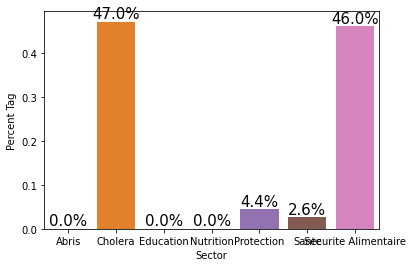

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Delmas,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delmas,Cholera,741.00,385.00,356.00,312.00,381.00,47.00,0.16,0.07,0.08,0.01
Delmas,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delmas,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delmas,Protection,3247.00,1514.00,1733.00,1282.00,1898.00,67.00,0.71,0.28,0.42,0.01
Delmas,Sante,583.00,282.00,301.00,289.00,257.00,37.00,0.13,0.06,0.06,0.01
Delmas,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


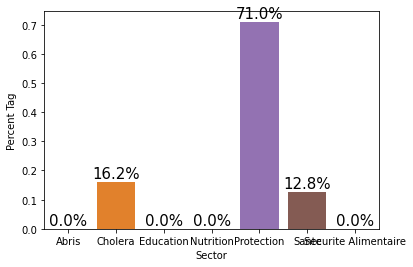

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Carrefour,Abris,728.00,346.00,382.00,322.00,360.00,46.00,0.15,0.06,0.07,0.01
Carrefour,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carrefour,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carrefour,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carrefour,Protection,901.00,455.00,446.00,388.00,502.00,11.00,0.18,0.08,0.10,0.00
Carrefour,Sante,320.00,144.00,176.00,158.00,144.00,18.00,0.06,0.03,0.03,0.00
Carrefour,Securite Alimentaire,3017.00,1511.00,1505.00,1478.00,1345.00,193.07,0.61,0.30,0.27,0.04


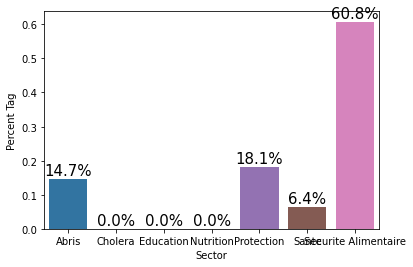

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Pétion-Ville,Abris,51766.00,25094.00,26672.00,21476.00,26976.00,3314.00,0.86,0.36,0.45,0.06
Pétion-Ville,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pétion-Ville,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pétion-Ville,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pétion-Ville,Protection,2141.00,1050.00,1091.00,731.00,1384.00,26.00,0.04,0.01,0.02,0.00
Pétion-Ville,Sante,4334.00,1102.00,3232.00,2506.00,1802.00,26.00,0.07,0.04,0.03,0.00
Pétion-Ville,Securite Alimentaire,1936.00,970.00,966.00,949.00,863.00,123.89,0.03,0.02,0.01,0.00


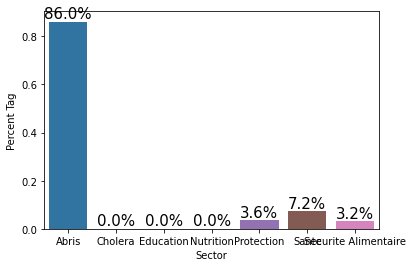

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Kenscoff,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kenscoff,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kenscoff,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kenscoff,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kenscoff,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Kenscoff,Sante,35.00,17.00,18.00,18.00,15.00,2.00,0.01,0.01,0.01,0.00
Kenscoff,Securite Alimentaire,2872.00,1439.00,1433.00,1407.00,1281.00,183.79,0.99,0.48,0.44,0.06


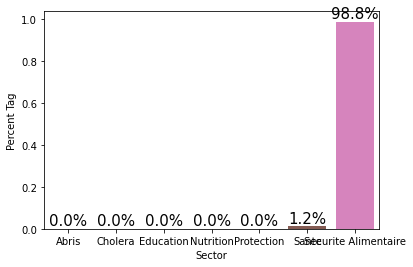

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Gressier,Abris,6860.00,3448.00,3412.00,3288.00,3132.00,440.00,0.51,0.25,0.23,0.03
Gressier,Cholera,2857.00,1486.00,1372.00,1370.00,1304.00,183.00,0.21,0.10,0.10,0.01
Gressier,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gressier,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gressier,Protection,357.00,176.00,181.00,143.00,211.00,3.00,0.03,0.01,0.02,0.00
Gressier,Sante,726.00,223.00,503.00,431.00,284.00,11.00,0.05,0.03,0.02,0.00
Gressier,Securite Alimentaire,2552.00,1278.00,1273.00,1250.00,1138.00,163.31,0.19,0.09,0.09,0.01


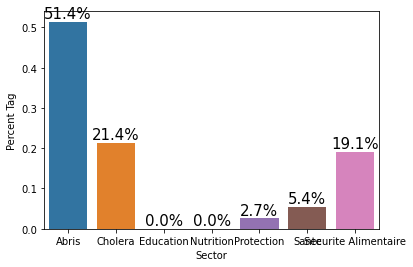

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cité Soleil,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cité Soleil,Cholera,2222.00,1156.00,1067.00,1009.00,1071.00,142.00,0.50,0.23,0.24,0.03
Cité Soleil,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cité Soleil,Nutrition,1300.00,624.00,676.00,1300.00,0.00,0.00,0.29,0.29,0.00,0.00
Cité Soleil,Protection,733.00,362.00,371.00,263.00,450.00,20.00,0.16,0.06,0.10,0.00
Cité Soleil,Sante,206.00,100.00,106.00,102.00,91.00,13.00,0.05,0.02,0.02,0.00
Cité Soleil,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


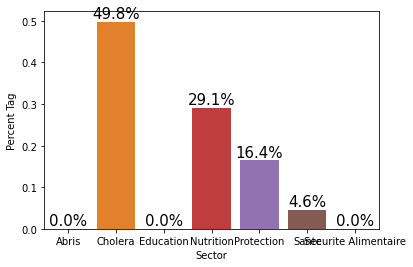

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Tabarre,Abris,6914.00,3262.00,3652.00,2914.00,3558.00,442.00,0.24,0.10,0.12,0.02
Tabarre,Cholera,20319.00,10566.00,9753.00,8564.00,10454.00,1300.00,0.69,0.29,0.36,0.04
Tabarre,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tabarre,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tabarre,Protection,1008.00,492.00,516.00,349.00,644.00,15.00,0.03,0.01,0.02,0.00
Tabarre,Sante,1118.00,402.00,716.00,599.00,482.00,37.00,0.04,0.02,0.02,0.00
Tabarre,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


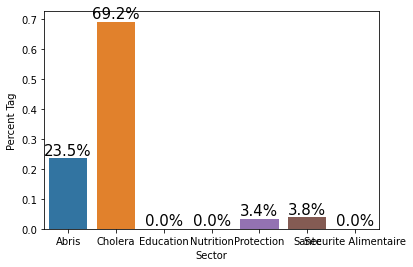

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Léogâne,Abris,35648.00,17700.00,17948.00,16458.00,16908.00,2282.00,0.34,0.16,0.16,0.02
Léogâne,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Léogâne,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Léogâne,Nutrition,950.00,456.00,494.00,950.00,0.00,0.00,0.01,0.01,0.00,0.00
Léogâne,Protection,1920.00,968.00,952.00,723.00,1166.00,31.00,0.02,0.01,0.01,0.00
Léogâne,Sante,3041.00,786.00,2255.00,1827.00,1202.00,12.00,0.03,0.02,0.01,0.00
Léogâne,Securite Alimentaire,62941.00,31533.00,31408.00,30841.00,28072.00,4028.23,0.60,0.30,0.27,0.04


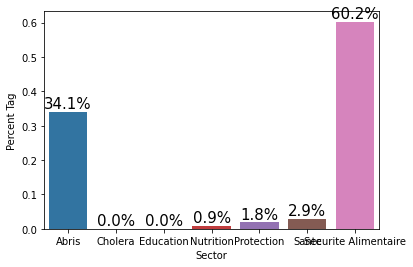

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Petit-Goâve,Abris,33750.00,17066.00,16684.00,16126.00,15464.00,2160.00,0.36,0.17,0.17,0.02
Petit-Goâve,Cholera,106.00,55.00,51.00,51.00,48.00,7.00,0.00,0.00,0.00,0.00
Petit-Goâve,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petit-Goâve,Nutrition,850.00,408.00,442.00,850.00,0.00,0.00,0.01,0.01,0.00,0.00
Petit-Goâve,Protection,810.00,405.00,405.00,275.00,535.00,0.00,0.01,0.00,0.01,0.00
Petit-Goâve,Sante,2945.00,790.00,2155.00,1807.00,1125.00,13.00,0.03,0.02,0.01,0.00
Petit-Goâve,Securite Alimentaire,54484.00,27296.00,27188.00,26697.00,24300.00,3486.97,0.59,0.29,0.26,0.04


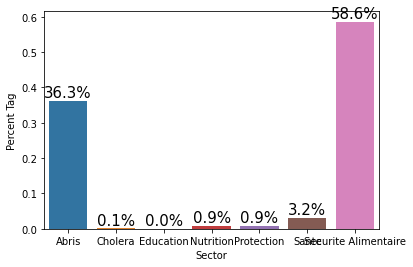

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Grand-Goâve,Abris,22442.00,10600.00,11842.00,10350.00,10656.00,1436.00,0.33,0.15,0.16,0.02
Grand-Goâve,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand-Goâve,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand-Goâve,Nutrition,650.00,312.00,338.00,650.00,0.00,0.00,0.01,0.01,0.00,0.00
Grand-Goâve,Protection,562.00,281.00,281.00,180.00,382.00,0.00,0.01,0.00,0.01,0.00
Grand-Goâve,Sante,1880.00,456.00,1424.00,1121.00,756.00,3.00,0.03,0.02,0.01,0.00
Grand-Goâve,Securite Alimentaire,42998.00,21542.00,21456.00,21069.00,19177.00,2751.88,0.63,0.31,0.28,0.04


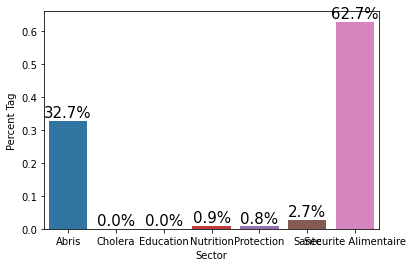

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Croix-Des-Bouquets,Abris,21286.00,10432.00,10854.00,9788.00,10136.00,1362.00,0.18,0.08,0.09,0.01
Croix-Des-Bouquets,Cholera,8149.00,4237.00,3911.00,3747.00,3880.00,522.00,0.07,0.03,0.03,0.00
Croix-Des-Bouquets,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Croix-Des-Bouquets,Nutrition,1200.00,576.00,624.00,1200.00,0.00,0.00,0.01,0.01,0.00,0.00
Croix-Des-Bouquets,Protection,3940.00,1934.00,2006.00,1369.00,2497.00,74.00,0.03,0.01,0.02,0.00
Croix-Des-Bouquets,Sante,3350.00,1197.00,2153.00,1813.00,1429.00,108.00,0.03,0.02,0.01,0.00
Croix-Des-Bouquets,Securite Alimentaire,78411.00,39284.00,39127.00,38421.00,34971.00,5018.30,0.67,0.33,0.30,0.04


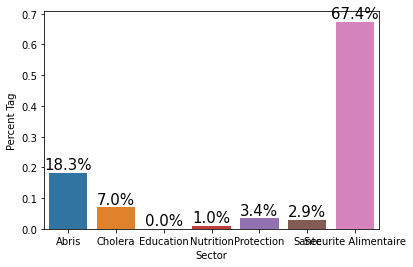

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Thomazeau,Abris,7208.00,3684.00,3524.00,3442.00,3304.00,462.00,0.56,0.27,0.26,0.04
Thomazeau,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomazeau,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomazeau,Nutrition,250.00,120.00,130.00,250.00,0.00,0.00,0.02,0.02,0.00,0.00
Thomazeau,Protection,576.00,280.00,296.00,232.00,316.00,28.00,0.04,0.02,0.02,0.00
Thomazeau,Sante,1106.00,314.00,792.00,660.00,435.00,11.00,0.09,0.05,0.03,0.00
Thomazeau,Securite Alimentaire,3707.00,1857.00,1850.00,1817.00,1653.00,237.26,0.29,0.14,0.13,0.02


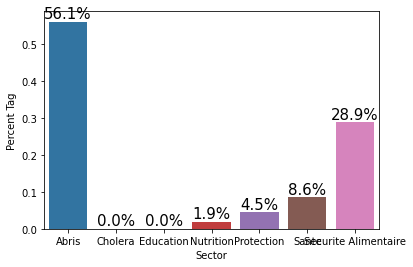

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Ganthier,Abris,12254.00,6156.00,6098.00,5736.00,5734.00,784.00,0.53,0.25,0.25,0.03
Ganthier,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ganthier,Education,3966.00,2538.00,1428.00,3966.00,0.00,0.00,0.17,0.17,0.00,0.00
Ganthier,Nutrition,300.00,144.00,156.00,300.00,0.00,0.00,0.01,0.01,0.00,0.00
Ganthier,Protection,746.00,364.00,382.00,273.00,437.00,36.00,0.03,0.01,0.02,0.00
Ganthier,Sante,1566.00,423.00,1143.00,934.00,621.00,11.00,0.07,0.04,0.03,0.00
Ganthier,Securite Alimentaire,4377.00,2193.00,2184.00,2145.00,1952.00,280.15,0.19,0.09,0.08,0.01


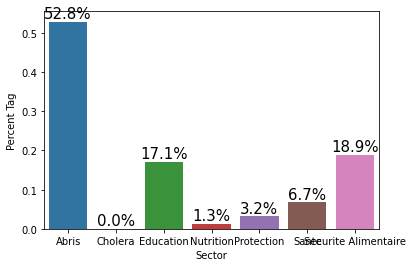

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cornillon / Grand Bois,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cornillon / Grand Bois,Cholera,17038.00,8860.00,8178.00,8679.00,7269.00,1090.00,0.57,0.29,0.24,0.04
Cornillon / Grand Bois,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cornillon / Grand Bois,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cornillon / Grand Bois,Protection,526.00,254.00,272.00,261.00,232.00,33.00,0.02,0.01,0.01,0.00
Cornillon / Grand Bois,Sante,504.00,143.00,361.00,287.00,210.00,7.00,0.02,0.01,0.01,0.00
Cornillon / Grand Bois,Securite Alimentaire,11924.00,5974.00,5950.00,5843.00,5318.00,763.15,0.40,0.19,0.18,0.03


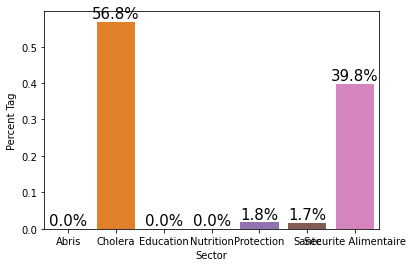

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Fonds-Verrettes,Abris,10556.00,5358.00,5198.00,5942.00,3938.00,676.00,0.30,0.17,0.11,0.02
Fonds-Verrettes,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fonds-Verrettes,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fonds-Verrettes,Nutrition,250.00,120.00,130.00,250.00,0.00,0.00,0.01,0.01,0.00,0.00
Fonds-Verrettes,Protection,606.00,295.00,311.00,219.00,360.00,27.00,0.02,0.01,0.01,0.00
Fonds-Verrettes,Sante,1256.00,327.00,929.00,798.00,458.00,0.00,0.04,0.02,0.01,0.00
Fonds-Verrettes,Securite Alimentaire,22153.00,11099.00,11054.00,10855.00,9880.00,1417.79,0.64,0.31,0.28,0.04


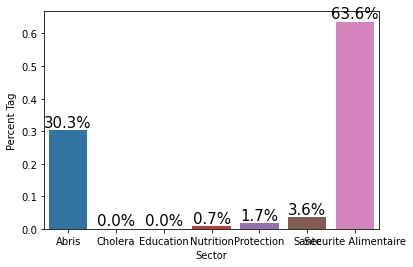

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Arcahaie,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arcahaie,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arcahaie,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arcahaie,Nutrition,650.00,312.00,338.00,650.00,0.00,0.00,0.04,0.04,0.00,0.00
Arcahaie,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arcahaie,Sante,3052.00,889.00,2163.00,1733.00,1273.00,46.00,0.18,0.10,0.08,0.00
Arcahaie,Securite Alimentaire,13031.00,6528.00,6502.00,6385.00,5812.00,833.96,0.78,0.38,0.35,0.05


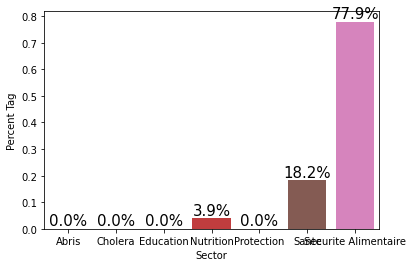

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cabaret,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cabaret,Cholera,17991.00,9355.00,8635.00,9200.00,7639.00,1151.00,0.67,0.34,0.28,0.04
Cabaret,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cabaret,Nutrition,350.00,168.00,182.00,350.00,0.00,0.00,0.01,0.01,0.00,0.00
Cabaret,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cabaret,Sante,1667.00,499.00,1168.00,941.00,697.00,29.00,0.06,0.04,0.03,0.00
Cabaret,Securite Alimentaire,6824.00,3419.00,3405.00,3344.00,3044.00,436.77,0.25,0.12,0.11,0.02


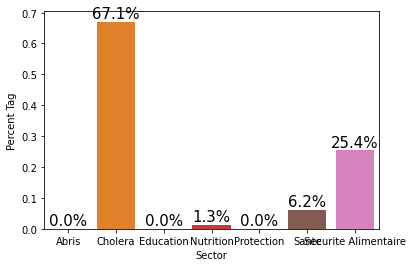

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse à Galets,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse à Galets,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse à Galets,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse à Galets,Nutrition,300.00,144.00,156.00,300.00,0.00,0.00,0.03,0.03,0.00,0.00
Anse à Galets,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse à Galets,Sante,1262.00,294.00,968.00,745.00,517.00,0.00,0.12,0.07,0.05,0.00
Anse à Galets,Securite Alimentaire,9384.00,4701.00,4683.00,4598.00,4185.00,600.57,0.86,0.42,0.38,0.05


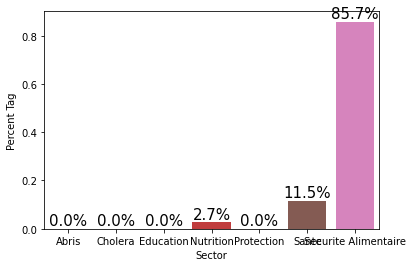

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Pointe à Raquette,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pointe à Raquette,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pointe à Raquette,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pointe à Raquette,Nutrition,120.00,58.00,62.00,120.00,0.00,0.00,0.03,0.03,0.00,0.00
Pointe à Raquette,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pointe à Raquette,Sante,632.00,182.00,450.00,360.00,263.00,9.00,0.14,0.08,0.06,0.00
Pointe à Raquette,Securite Alimentaire,3678.00,1843.00,1835.00,1802.00,1640.00,235.37,0.83,0.41,0.37,0.05


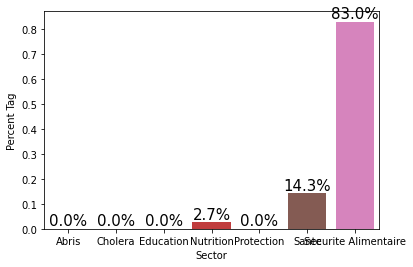

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Jacmel,Abris,27704.00,13690.00,14014.00,10114.00,15816.00,1774.00,0.30,0.11,0.17,0.02
Jacmel,Cholera,106.00,55.00,51.00,39.00,60.00,7.00,0.00,0.00,0.00,0.00
Jacmel,Education,15755.00,7915.00,7840.00,15755.00,0.00,0.00,0.17,0.17,0.00,0.00
Jacmel,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jacmel,Protection,634.00,317.00,317.00,185.00,449.00,0.00,0.01,0.00,0.00,0.00
Jacmel,Sante,2764.00,828.00,1936.00,1412.00,1302.00,50.00,0.03,0.02,0.01,0.00
Jacmel,Securite Alimentaire,44014.00,22051.00,21963.00,21567.00,19630.00,2816.92,0.48,0.24,0.22,0.03


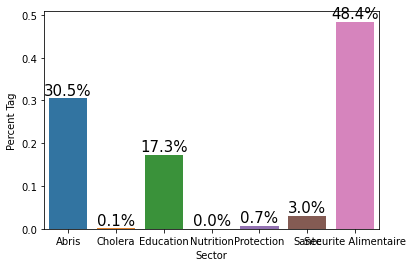

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Marigot,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marigot,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marigot,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marigot,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marigot,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marigot,Sante,309.00,154.00,155.00,125.00,164.00,20.00,0.01,0.01,0.01,0.00
Marigot,Securite Alimentaire,21579.00,10811.00,10768.00,10574.00,9624.00,1381.07,0.99,0.48,0.44,0.06


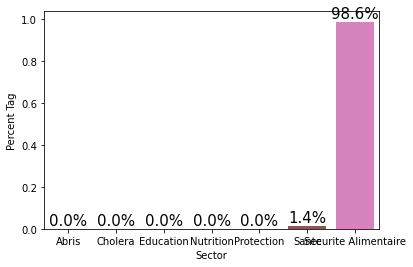

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cayes-Jacmel,Abris,2338.00,1136.00,1202.00,964.00,1224.00,150.00,0.15,0.06,0.08,0.01
Cayes-Jacmel,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cayes-Jacmel,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cayes-Jacmel,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cayes-Jacmel,Protection,56.00,28.00,28.00,17.00,39.00,0.00,0.00,0.00,0.00,0.00
Cayes-Jacmel,Sante,200.00,53.00,147.00,112.00,87.00,1.00,0.01,0.01,0.01,0.00
Cayes-Jacmel,Securite Alimentaire,12803.00,6414.00,6389.00,6274.00,5710.00,819.40,0.83,0.41,0.37,0.05


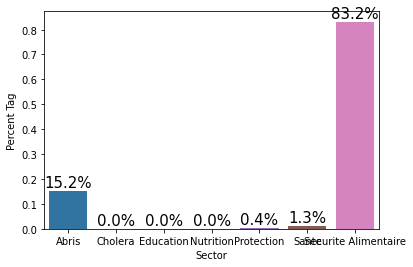

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
La Vallée,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Vallée,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Vallée,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Vallée,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Vallée,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Vallée,Sante,103.00,51.00,52.00,41.00,55.00,7.00,0.01,0.00,0.00,0.00
La Vallée,Securite Alimentaire,11475.00,5749.00,5726.00,5623.00,5118.00,734.37,0.99,0.49,0.44,0.06


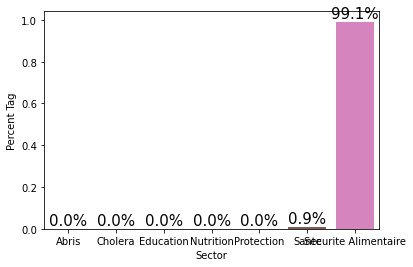

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bainet,Abris,8522.00,4344.00,4178.00,3474.00,4502.00,546.00,0.23,0.09,0.12,0.01
Bainet,Cholera,106.00,55.00,51.00,43.00,56.00,7.00,0.00,0.00,0.00,0.00
Bainet,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bainet,Nutrition,300.00,144.00,156.00,300.00,0.00,0.00,0.01,0.01,0.00,0.00
Bainet,Protection,194.00,97.00,97.00,60.00,134.00,0.00,0.01,0.00,0.00,0.00
Bainet,Sante,762.00,216.00,546.00,417.00,336.00,9.00,0.02,0.01,0.01,0.00
Bainet,Securite Alimentaire,27494.00,13775.00,13720.00,13472.00,12262.00,1759.63,0.74,0.36,0.33,0.05


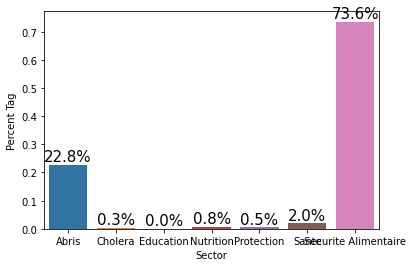

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Côtes de Fer,Abris,1530.00,808.00,722.00,618.00,814.00,98.00,0.09,0.04,0.05,0.01
Côtes de Fer,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Côtes de Fer,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Côtes de Fer,Nutrition,170.00,82.00,88.00,170.00,0.00,0.00,0.01,0.01,0.00,0.00
Côtes de Fer,Protection,36.00,18.00,18.00,12.00,24.00,0.00,0.00,0.00,0.00,0.00
Côtes de Fer,Sante,153.00,46.00,107.00,84.00,67.00,2.00,0.01,0.00,0.00,0.00
Côtes de Fer,Securite Alimentaire,15592.00,7812.00,7780.00,7640.00,6954.00,997.89,0.89,0.44,0.40,0.06


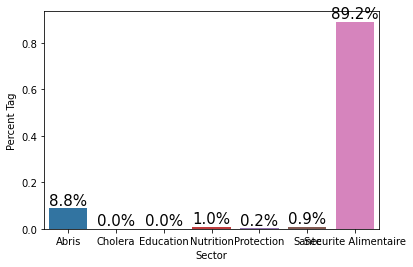

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Belle Anse,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belle Anse,Cholera,1164.00,605.00,559.00,538.00,551.00,75.00,0.04,0.02,0.02,0.00
Belle Anse,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belle Anse,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belle Anse,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belle Anse,Sante,35.00,17.00,18.00,14.00,19.00,2.00,0.00,0.00,0.00,0.00
Belle Anse,Securite Alimentaire,24988.00,12519.00,12469.00,12244.00,11145.00,1599.22,0.95,0.47,0.43,0.06


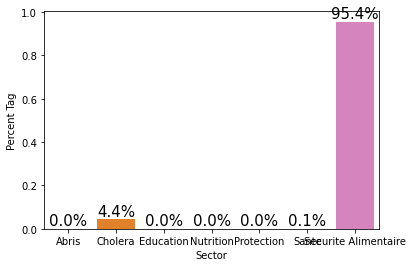

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Grand Gosier,Abris,3362.00,1682.00,1680.00,1462.00,1684.00,216.00,0.35,0.15,0.18,0.02
Grand Gosier,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand Gosier,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand Gosier,Nutrition,60.00,29.00,31.00,60.00,0.00,0.00,0.01,0.01,0.00,0.00
Grand Gosier,Protection,78.00,39.00,39.00,25.00,53.00,0.00,0.01,0.00,0.01,0.00
Grand Gosier,Sante,429.00,148.00,281.00,222.00,196.00,11.00,0.04,0.02,0.02,0.00
Grand Gosier,Securite Alimentaire,5612.00,2812.00,2801.00,2750.00,2503.00,359.19,0.59,0.29,0.26,0.04


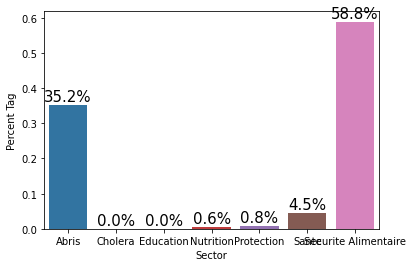

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Thiotte,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thiotte,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thiotte,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thiotte,Nutrition,120.00,58.00,62.00,120.00,0.00,0.00,0.01,0.01,0.00,0.00
Thiotte,Protection,308.00,154.00,154.00,125.00,163.00,20.00,0.03,0.01,0.01,0.00
Thiotte,Sante,440.00,158.00,282.00,220.00,207.00,13.00,0.04,0.02,0.02,0.00
Thiotte,Securite Alimentaire,11354.00,5688.00,5666.00,5564.00,5064.00,726.67,0.93,0.46,0.41,0.06


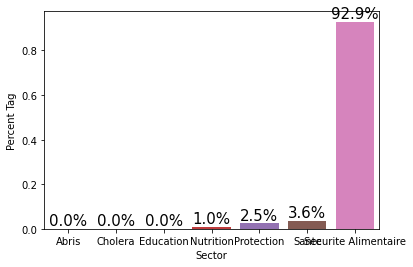

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse-à-Pître,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Pître,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Pître,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Pître,Nutrition,100.00,48.00,52.00,100.00,0.00,0.00,0.01,0.01,0.00,0.00
Anse-à-Pître,Protection,266.00,133.00,133.00,108.00,141.00,17.00,0.03,0.01,0.01,0.00
Anse-à-Pître,Sante,340.00,117.00,223.00,174.00,157.00,9.00,0.03,0.02,0.02,0.00
Anse-à-Pître,Securite Alimentaire,9679.00,4849.00,4830.00,4743.00,4317.00,619.43,0.93,0.46,0.42,0.06


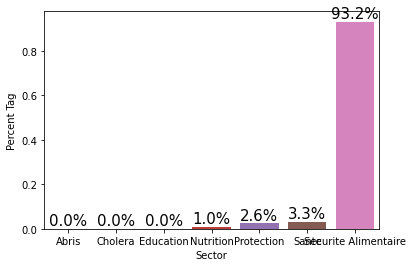

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cap-Haïtien,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cap-Haïtien,Cholera,6350.00,3302.00,3048.00,2848.00,3096.00,406.00,0.31,0.14,0.15,0.02
Cap-Haïtien,Education,7249.00,3697.00,3552.00,7249.00,0.00,0.00,0.35,0.35,0.00,0.00
Cap-Haïtien,Nutrition,1350.00,648.00,702.00,1350.00,0.00,0.00,0.07,0.07,0.00,0.00
Cap-Haïtien,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cap-Haïtien,Sante,5083.00,1242.00,3841.00,3024.00,2048.00,11.00,0.25,0.15,0.10,0.00
Cap-Haïtien,Securite Alimentaire,537.00,269.00,268.00,263.00,239.00,34.36,0.03,0.01,0.01,0.00


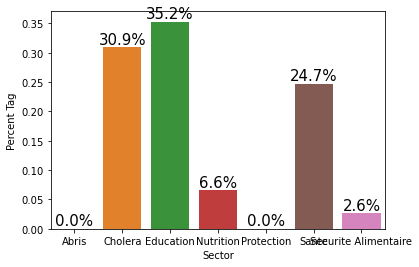

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Quartier Morin,Abris,10.00,4.00,6.00,4.00,6.00,0.64,0.00,0.00,0.00,0.00
Quartier Morin,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Quartier Morin,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Quartier Morin,Nutrition,135.00,65.00,70.00,135.00,0.00,0.00,0.04,0.04,0.00,0.00
Quartier Morin,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Quartier Morin,Sante,525.00,133.00,392.00,311.00,212.00,2.00,0.15,0.09,0.06,0.00
Quartier Morin,Securite Alimentaire,2736.00,1371.00,1365.00,1341.00,1220.00,175.10,0.80,0.39,0.36,0.05


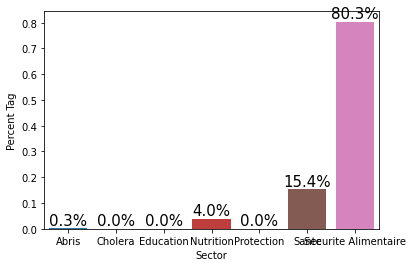

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Limonade,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limonade,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limonade,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limonade,Nutrition,275.00,132.00,143.00,275.00,0.00,0.00,0.04,0.04,0.00,0.00
Limonade,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limonade,Sante,1056.00,267.00,789.00,625.00,427.00,4.00,0.15,0.09,0.06,0.00
Limonade,Securite Alimentaire,5514.00,2763.00,2752.00,2702.00,2459.00,352.93,0.81,0.39,0.36,0.05


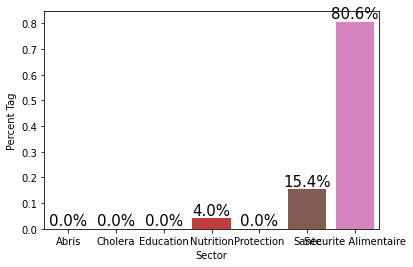

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Acul du Nord,Abris,100.00,48.00,52.00,42.00,52.00,6.40,0.01,0.01,0.01,0.00
Acul du Nord,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Acul du Nord,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Acul du Nord,Nutrition,275.00,132.00,143.00,275.00,0.00,0.00,0.04,0.04,0.00,0.00
Acul du Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Acul du Nord,Sante,1070.00,270.00,800.00,633.00,433.00,4.00,0.15,0.09,0.06,0.00
Acul du Nord,Securite Alimentaire,5591.00,2801.00,2790.00,2739.00,2493.00,357.81,0.79,0.39,0.35,0.05


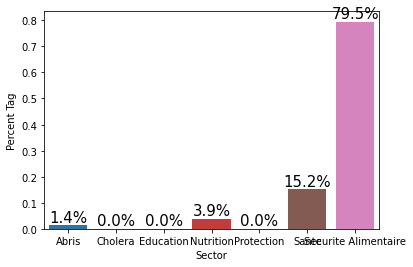

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Plaine du Nord,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaine du Nord,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaine du Nord,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaine du Nord,Nutrition,205.00,98.00,107.00,205.00,0.00,0.00,0.04,0.04,0.00,0.00
Plaine du Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaine du Nord,Sante,773.00,191.00,582.00,459.00,312.00,2.00,0.15,0.09,0.06,0.00
Plaine du Nord,Securite Alimentaire,4126.00,2067.00,2059.00,2021.00,1840.00,264.03,0.81,0.40,0.36,0.05


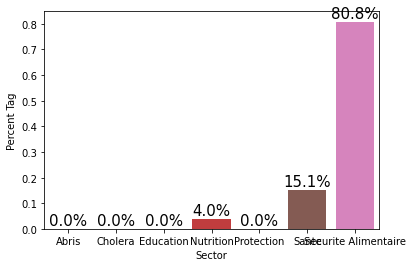

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Milot,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Milot,Cholera,106.00,55.00,51.00,51.00,48.00,7.00,0.03,0.01,0.01,0.00
Milot,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Milot,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Milot,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Milot,Sante,608.00,153.00,455.00,360.00,246.00,2.00,0.16,0.09,0.06,0.00
Milot,Securite Alimentaire,3199.00,1603.00,1596.00,1568.00,1427.00,204.75,0.82,0.40,0.36,0.05


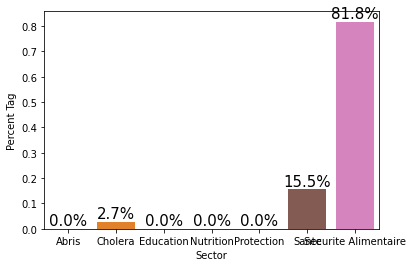

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Grande Riviere Du Nord,Abris,150.00,72.00,78.00,62.00,78.00,9.60,0.02,0.01,0.01,0.00
Grande Riviere Du Nord,Cholera,2117.00,1101.00,1016.00,955.00,1027.00,135.00,0.30,0.13,0.14,0.02
Grande Riviere Du Nord,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Riviere Du Nord,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Riviere Du Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Riviere Du Nord,Sante,746.00,177.00,569.00,446.00,300.00,0.00,0.10,0.06,0.04,0.00
Grande Riviere Du Nord,Securite Alimentaire,4136.00,2072.00,2064.00,2027.00,1845.00,264.72,0.58,0.28,0.26,0.04


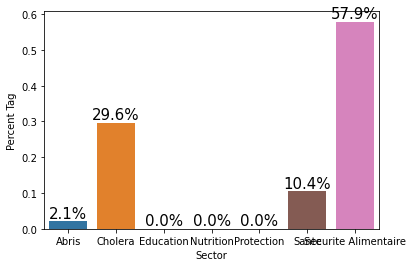

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bahon,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bahon,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bahon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bahon,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bahon,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bahon,Sante,416.00,98.00,318.00,249.00,167.00,0.00,0.15,0.09,0.06,0.00
Bahon,Securite Alimentaire,2325.00,1165.00,1160.00,1139.00,1037.00,148.81,0.85,0.42,0.38,0.05


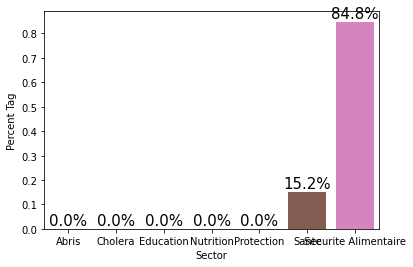

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint-Raphaël,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Raphaël,Cholera,317.00,165.00,152.00,162.00,136.00,20.00,0.05,0.02,0.02,0.00
Saint-Raphaël,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Raphaël,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Raphaël,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Raphaël,Sante,980.00,236.00,744.00,585.00,394.00,1.00,0.15,0.09,0.06,0.00
Saint-Raphaël,Securite Alimentaire,5376.00,2693.00,2682.00,2634.00,2397.00,344.03,0.81,0.39,0.36,0.05


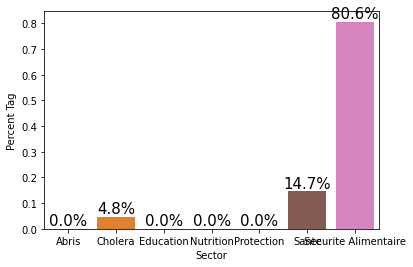

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Dondon,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dondon,Cholera,106.00,55.00,51.00,51.00,48.00,7.00,0.03,0.01,0.01,0.00
Dondon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dondon,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dondon,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dondon,Sante,641.00,156.00,485.00,382.00,258.00,1.00,0.15,0.09,0.06,0.00
Dondon,Securite Alimentaire,3460.00,1734.00,1727.00,1696.00,1543.00,221.47,0.82,0.40,0.37,0.05


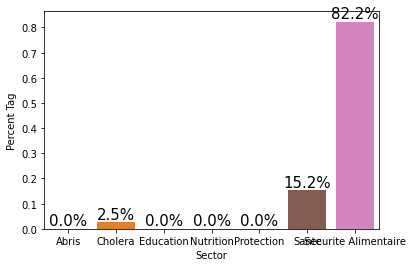

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Ranquitte,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ranquitte,Cholera,106.00,55.00,51.00,52.00,47.00,7.00,0.03,0.01,0.01,0.00
Ranquitte,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ranquitte,Nutrition,138.00,66.00,72.00,138.00,0.00,0.00,0.04,0.04,0.00,0.00
Ranquitte,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ranquitte,Sante,507.00,122.00,385.00,302.00,204.00,1.00,0.14,0.09,0.06,0.00
Ranquitte,Securite Alimentaire,2770.00,1388.00,1382.00,1357.00,1236.00,177.31,0.79,0.39,0.35,0.05


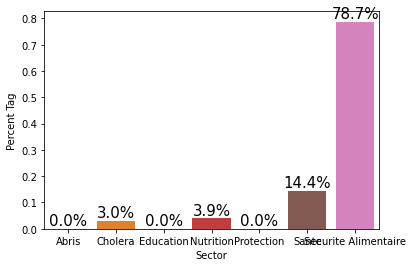

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Pignon,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pignon,Cholera,106.00,55.00,51.00,53.00,46.00,7.00,0.02,0.01,0.01,0.00
Pignon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pignon,Nutrition,215.00,103.00,112.00,215.00,0.00,0.00,0.04,0.04,0.00,0.00
Pignon,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pignon,Sante,777.00,184.00,593.00,465.00,312.00,0.00,0.14,0.09,0.06,0.00
Pignon,Securite Alimentaire,4326.00,2167.00,2159.00,2120.00,1930.00,276.88,0.80,0.39,0.36,0.05


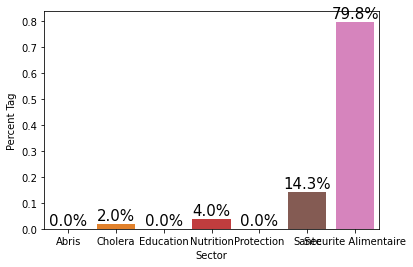

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
La Victoire,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Victoire,Cholera,212.00,110.00,102.00,111.00,87.00,14.00,0.14,0.07,0.06,0.01
La Victoire,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Victoire,Nutrition,50.00,24.00,26.00,50.00,0.00,0.00,0.03,0.03,0.00,0.00
La Victoire,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Victoire,Sante,189.00,45.00,144.00,113.00,76.00,0.00,0.13,0.08,0.05,0.00
La Victoire,Securite Alimentaire,1054.00,528.00,526.00,517.00,470.00,67.46,0.70,0.34,0.31,0.04


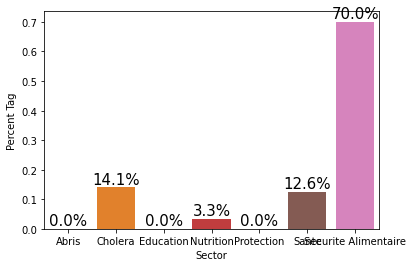

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Borgne,Abris,160.00,78.00,82.00,66.00,84.00,10.24,0.02,0.01,0.01,0.00
Borgne,Cholera,2222.00,1156.00,1067.00,1175.00,905.00,142.00,0.21,0.11,0.09,0.01
Borgne,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Borgne,Nutrition,300.00,144.00,156.00,300.00,0.00,0.00,0.03,0.03,0.00,0.00
Borgne,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Borgne,Sante,1233.00,300.00,933.00,735.00,496.00,2.00,0.12,0.07,0.05,0.00
Borgne,Securite Alimentaire,6692.00,3353.00,3339.00,3279.00,2985.00,428.29,0.63,0.31,0.28,0.04


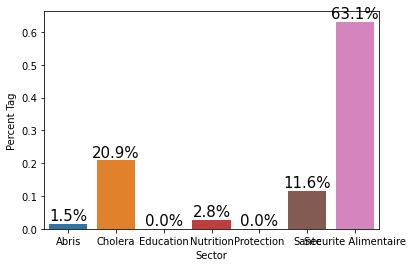

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Port-Margot,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Margot,Cholera,2117.00,1101.00,1016.00,1044.00,938.00,135.00,0.26,0.13,0.11,0.02
Port-Margot,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Margot,Nutrition,250.00,120.00,130.00,250.00,0.00,0.00,0.03,0.03,0.00,0.00
Port-Margot,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Margot,Sante,899.00,214.00,685.00,538.00,361.00,0.00,0.11,0.07,0.04,0.00
Port-Margot,Securite Alimentaire,4988.00,2499.00,2489.00,2444.00,2225.00,319.23,0.60,0.30,0.27,0.04


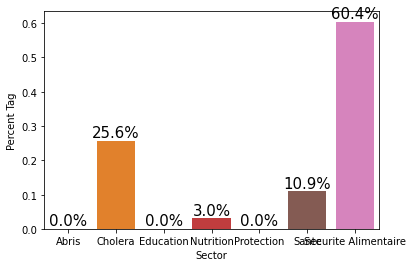

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Limbé,Abris,10.00,4.00,6.00,4.00,6.00,0.64,0.00,0.00,0.00,0.00
Limbé,Cholera,2963.00,1541.00,1422.00,1368.00,1405.00,190.00,0.22,0.10,0.10,0.01
Limbé,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limbé,Nutrition,425.00,204.00,221.00,425.00,0.00,0.00,0.03,0.03,0.00,0.00
Limbé,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Limbé,Sante,1665.00,428.00,1237.00,981.00,675.00,9.00,0.12,0.07,0.05,0.00
Limbé,Securite Alimentaire,8530.00,4274.00,4257.00,4180.00,3804.00,545.93,0.63,0.31,0.28,0.04


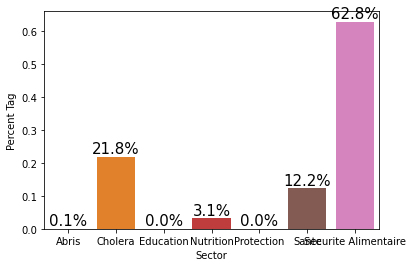

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bas Limbé,Abris,40.00,20.00,20.00,16.00,20.00,2.56,0.02,0.01,0.01,0.00
Bas Limbé,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bas Limbé,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bas Limbé,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bas Limbé,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bas Limbé,Sante,378.00,90.00,288.00,226.00,152.00,0.00,0.15,0.09,0.06,0.00
Bas Limbé,Securite Alimentaire,2090.00,1047.00,1043.00,1024.00,932.00,133.75,0.83,0.41,0.37,0.05


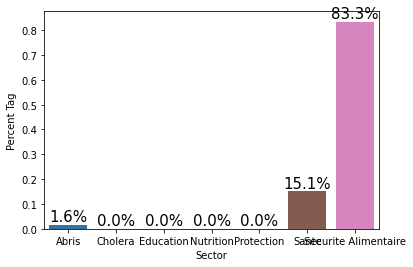

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Plaisance,Abris,740.00,358.00,382.00,308.00,386.00,47.37,0.04,0.01,0.02,0.00
Plaisance,Cholera,12170.00,6328.00,5842.00,6136.00,5255.00,779.00,0.58,0.29,0.25,0.04
Plaisance,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance,Sante,1248.00,295.00,953.00,747.00,501.00,0.00,0.06,0.04,0.02,0.00
Plaisance,Securite Alimentaire,6958.00,3486.00,3472.00,3410.00,3103.00,445.33,0.33,0.16,0.15,0.02


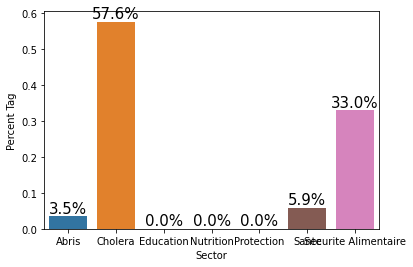

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Pilate,Abris,2370.00,1148.00,1222.00,984.00,1236.00,151.72,0.20,0.08,0.11,0.01
Pilate,Cholera,2963.00,1541.00,1422.00,1536.00,1237.00,190.00,0.25,0.13,0.11,0.02
Pilate,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pilate,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pilate,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pilate,Sante,968.00,228.00,740.00,580.00,388.00,0.00,0.08,0.05,0.03,0.00
Pilate,Securite Alimentaire,5405.00,2708.00,2697.00,2648.00,2411.00,345.92,0.46,0.23,0.21,0.03


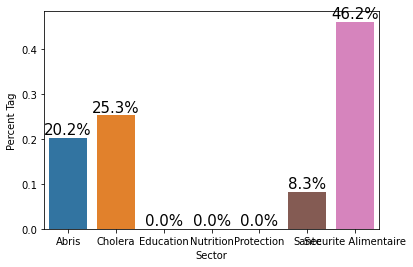

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Fort-Liberté,Abris,5824.00,2878.00,2946.00,2286.00,3166.00,372.00,0.69,0.27,0.38,0.04
Fort-Liberté,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fort-Liberté,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fort-Liberté,Nutrition,70.00,34.00,36.00,70.00,0.00,0.00,0.01,0.01,0.00,0.00
Fort-Liberté,Protection,397.00,199.00,198.00,131.00,247.00,19.00,0.05,0.02,0.03,0.00
Fort-Liberté,Sante,1377.00,354.00,1023.00,786.00,584.00,7.00,0.16,0.09,0.07,0.00
Fort-Liberté,Securite Alimentaire,750.00,376.00,374.00,368.00,335.00,48.03,0.09,0.04,0.04,0.01


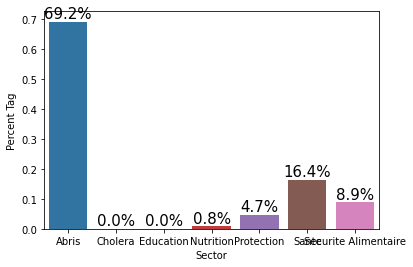

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Ferrier,Abris,3032.00,1558.00,1474.00,1274.00,1564.00,194.00,0.57,0.24,0.30,0.04
Ferrier,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ferrier,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ferrier,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ferrier,Protection,177.00,89.00,88.00,56.00,113.00,8.00,0.03,0.01,0.02,0.00
Ferrier,Sante,621.00,160.00,461.00,362.00,257.00,2.00,0.12,0.07,0.05,0.00
Ferrier,Securite Alimentaire,1464.00,734.00,731.00,717.00,653.00,93.71,0.28,0.14,0.12,0.02


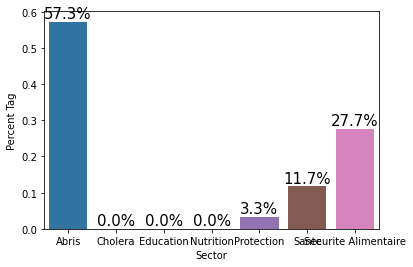

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Perches,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perches,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perches,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perches,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perches,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perches,Sante,207.00,50.00,157.00,122.00,85.00,0.00,0.15,0.09,0.06,0.00
Perches,Securite Alimentaire,1156.00,579.00,577.00,566.00,515.00,73.96,0.85,0.42,0.38,0.05


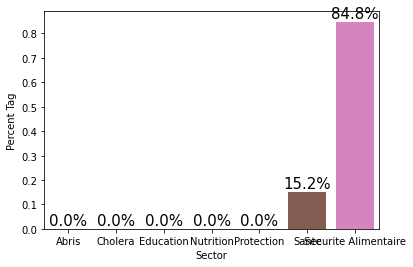

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Ouanaminthe,Abris,20306.00,10012.00,10294.00,8644.00,10362.00,1300.00,0.51,0.22,0.26,0.03
Ouanaminthe,Cholera,212.00,110.00,102.00,90.00,108.00,14.00,0.01,0.00,0.00,0.00
Ouanaminthe,Education,2644.00,1692.00,952.00,2644.00,0.00,0.00,0.07,0.07,0.00,0.00
Ouanaminthe,Nutrition,220.00,106.00,114.00,220.00,0.00,0.00,0.01,0.01,0.00,0.00
Ouanaminthe,Protection,1264.00,634.00,630.00,403.00,801.00,60.00,0.03,0.01,0.02,0.00
Ouanaminthe,Sante,4255.00,1050.00,3205.00,2482.00,1766.00,7.00,0.11,0.06,0.04,0.00
Ouanaminthe,Securite Alimentaire,10613.00,5317.00,5296.00,5200.00,4733.00,679.23,0.27,0.13,0.12,0.02


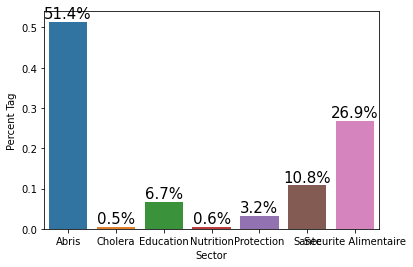

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Capotille,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capotille,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capotille,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capotille,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capotille,Protection,171.00,86.00,85.00,74.00,86.00,11.00,0.07,0.03,0.03,0.00
Capotille,Sante,504.00,128.00,376.00,292.00,210.00,2.00,0.19,0.11,0.08,0.00
Capotille,Securite Alimentaire,1938.00,971.00,967.00,950.00,864.00,124.04,0.74,0.36,0.33,0.05


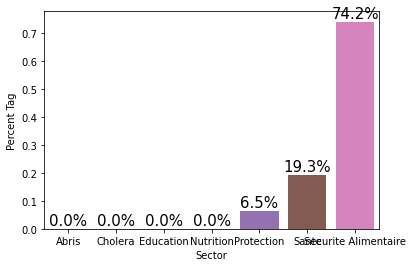

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Mont-Organisé,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mont-Organisé,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mont-Organisé,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mont-Organisé,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mont-Organisé,Protection,185.00,93.00,92.00,80.00,93.00,12.00,0.07,0.03,0.03,0.00
Mont-Organisé,Sante,516.00,124.00,392.00,303.00,213.00,0.00,0.18,0.11,0.08,0.00
Mont-Organisé,Securite Alimentaire,2097.00,1051.00,1047.00,1028.00,935.00,134.23,0.75,0.37,0.33,0.05


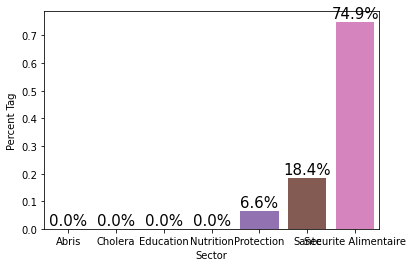

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Trou du Nord,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Trou du Nord,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Trou du Nord,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Trou du Nord,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Trou du Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Trou du Nord,Sante,1014.00,280.00,734.00,574.00,431.00,9.00,0.17,0.10,0.07,0.00
Trou du Nord,Securite Alimentaire,4893.00,2451.00,2442.00,2398.00,2182.00,313.16,0.83,0.41,0.37,0.05


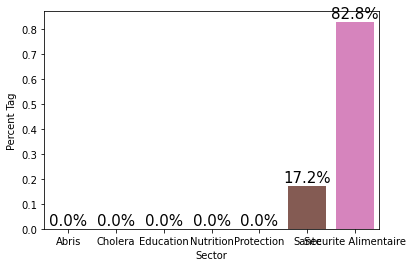

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Sainte Suzanne,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sainte Suzanne,Cholera,106.00,55.00,51.00,47.00,52.00,7.00,0.03,0.01,0.02,0.00
Sainte Suzanne,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sainte Suzanne,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sainte Suzanne,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sainte Suzanne,Sante,504.00,122.00,382.00,296.00,208.00,0.00,0.15,0.09,0.06,0.00
Sainte Suzanne,Securite Alimentaire,2803.00,1404.00,1399.00,1374.00,1250.00,179.40,0.82,0.40,0.37,0.05


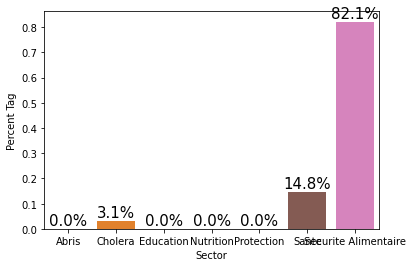

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Terrier Rouge,Abris,3662.00,1846.00,1816.00,1464.00,1964.00,234.00,0.48,0.19,0.26,0.03
Terrier Rouge,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Terrier Rouge,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Terrier Rouge,Nutrition,60.00,29.00,31.00,60.00,0.00,0.00,0.01,0.01,0.00,0.00
Terrier Rouge,Protection,84.00,42.00,42.00,25.00,59.00,0.00,0.01,0.00,0.01,0.00
Terrier Rouge,Sante,816.00,197.00,619.00,477.00,339.00,0.00,0.11,0.06,0.04,0.00
Terrier Rouge,Securite Alimentaire,3032.00,1519.00,1513.00,1486.00,1352.00,194.07,0.40,0.19,0.18,0.03


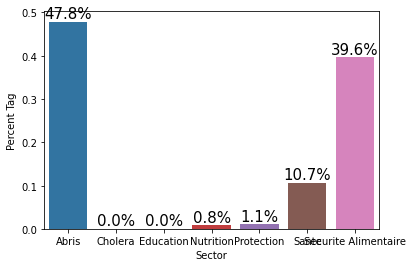

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Caracol,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Caracol,Cholera,106.00,55.00,51.00,43.00,56.00,7.00,0.05,0.02,0.03,0.00
Caracol,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Caracol,Nutrition,15.00,7.00,8.00,15.00,0.00,0.00,0.01,0.01,0.00,0.00
Caracol,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Caracol,Sante,173.00,51.00,122.00,96.00,75.00,2.00,0.09,0.05,0.04,0.00
Caracol,Securite Alimentaire,1671.00,837.00,834.00,819.00,745.00,106.97,0.85,0.42,0.38,0.05


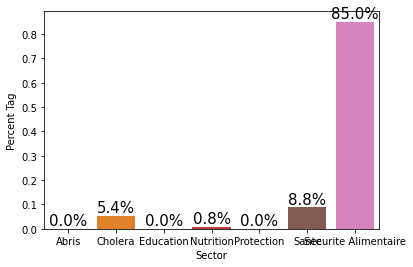

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Vallières,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Vallières,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Vallières,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Vallières,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Vallières,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Vallières,Sante,593.00,187.00,406.00,322.00,260.00,11.00,0.20,0.11,0.09,0.00
Vallières,Securite Alimentaire,2354.00,1179.00,1174.00,1153.00,1050.00,150.63,0.80,0.39,0.36,0.05


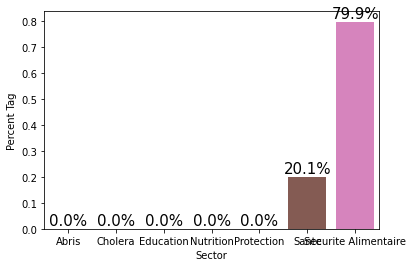

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Carice,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carice,Cholera,317.00,165.00,152.00,162.00,136.00,20.00,0.15,0.08,0.06,0.01
Carice,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carice,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Carice,Protection,120.00,60.00,60.00,52.00,61.00,7.00,0.06,0.02,0.03,0.00
Carice,Sante,348.00,87.00,261.00,202.00,145.00,1.00,0.16,0.09,0.07,0.00
Carice,Securite Alimentaire,1362.00,682.00,679.00,667.00,607.00,87.14,0.63,0.31,0.28,0.04


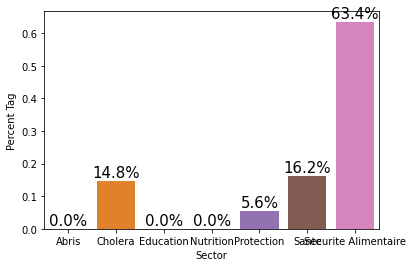

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Mombin Crochu,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mombin Crochu,Cholera,106.00,55.00,51.00,52.00,47.00,7.00,0.02,0.01,0.01,0.00
Mombin Crochu,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mombin Crochu,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mombin Crochu,Protection,307.00,154.00,153.00,132.00,155.00,20.00,0.06,0.03,0.03,0.00
Mombin Crochu,Sante,855.00,206.00,649.00,503.00,352.00,0.00,0.18,0.11,0.07,0.00
Mombin Crochu,Securite Alimentaire,3470.00,1738.00,1732.00,1700.00,1548.00,222.08,0.73,0.36,0.33,0.05


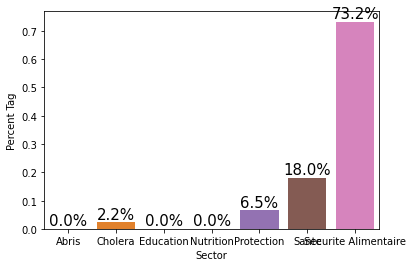

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Gonaïves,Abris,70.00,34.00,36.00,30.00,36.00,4.48,0.00,0.00,0.00,0.00
Gonaïves,Cholera,31854.00,16564.00,15290.00,11432.00,18382.00,2039.00,0.67,0.24,0.39,0.04
Gonaïves,Education,9665.00,4929.00,4736.00,9665.00,0.00,0.00,0.20,0.20,0.00,0.00
Gonaïves,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gonaïves,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gonaïves,Sante,1029.00,509.00,520.00,393.00,570.00,66.00,0.02,0.01,0.01,0.00
Gonaïves,Securite Alimentaire,4624.00,2316.00,2307.00,2266.00,2062.00,295.91,0.10,0.05,0.04,0.01


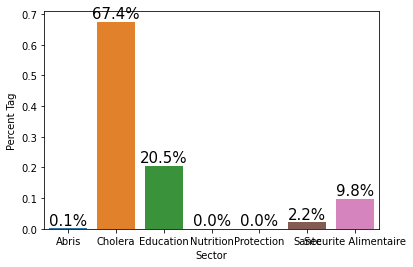

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Ennery,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ennery,Cholera,16826.00,8750.00,8077.00,6625.00,9125.00,1077.00,0.76,0.30,0.41,0.05
Ennery,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ennery,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ennery,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ennery,Sante,138.00,68.00,70.00,53.00,76.00,9.00,0.01,0.00,0.00,0.00
Ennery,Securite Alimentaire,5122.00,2566.00,2556.00,2510.00,2284.00,327.81,0.23,0.11,0.10,0.01


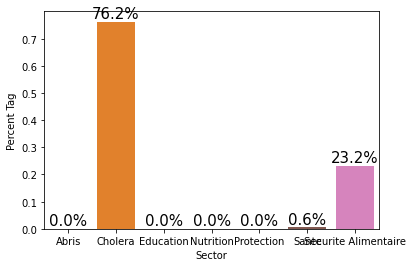

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
L'Estère,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Estère,Cholera,4127.00,2146.00,1981.00,1578.00,2285.00,264.00,0.73,0.28,0.41,0.05
L'Estère,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Estère,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Estère,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Estère,Sante,138.00,68.00,70.00,53.00,76.00,9.00,0.02,0.01,0.01,0.00
L'Estère,Securite Alimentaire,1355.00,679.00,676.00,664.00,604.00,86.71,0.24,0.12,0.11,0.02


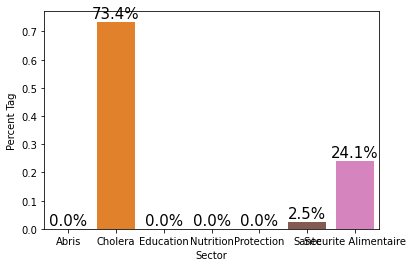

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Gros Morne,Abris,120770.00,58544.00,62226.00,50104.00,62934.00,7731.56,0.85,0.35,0.44,0.05
Gros Morne,Cholera,5820.00,3027.00,2794.00,2287.00,3160.00,373.00,0.04,0.02,0.02,0.00
Gros Morne,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gros Morne,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gros Morne,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gros Morne,Sante,686.00,339.00,347.00,262.00,380.00,44.00,0.00,0.00,0.00,0.00
Gros Morne,Securite Alimentaire,14765.00,7398.00,7368.00,7235.00,6585.00,944.99,0.10,0.05,0.05,0.01


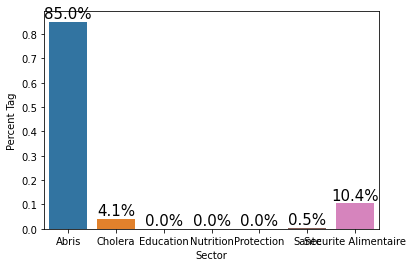

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Terre Neuve,Abris,4980.00,2414.00,2566.00,2066.00,2596.00,318.81,0.65,0.27,0.34,0.04
Terre Neuve,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Terre Neuve,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Terre Neuve,Nutrition,185.00,89.00,96.00,185.00,0.00,0.00,0.02,0.02,0.00,0.00
Terre Neuve,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Terre Neuve,Sante,6.00,3.00,3.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00
Terre Neuve,Securite Alimentaire,2500.00,1253.00,1248.00,1225.00,1115.00,160.01,0.33,0.16,0.15,0.02


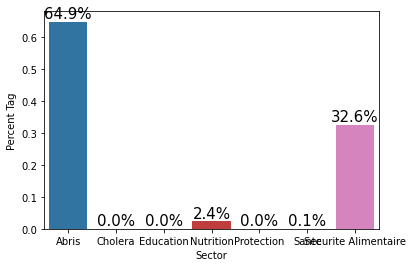

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse Rouge,Abris,160.00,78.00,82.00,66.00,84.00,10.24,0.04,0.02,0.02,0.00
Anse Rouge,Cholera,212.00,110.00,102.00,82.00,115.00,14.00,0.05,0.02,0.03,0.00
Anse Rouge,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse Rouge,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse Rouge,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse Rouge,Sante,24.00,12.00,12.00,9.00,13.00,2.00,0.01,0.00,0.00,0.00
Anse Rouge,Securite Alimentaire,3472.00,1739.00,1732.00,1701.00,1548.00,222.18,0.90,0.44,0.40,0.06


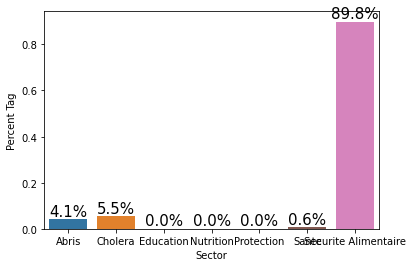

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint-Marc,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Marc,Cholera,5715.00,2972.00,2743.00,2052.00,3297.00,366.00,0.73,0.26,0.42,0.05
Saint-Marc,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Marc,Nutrition,1500.00,720.00,780.00,1500.00,0.00,0.00,0.19,0.19,0.00,0.00
Saint-Marc,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Marc,Sante,652.00,323.00,329.00,249.00,361.00,42.00,0.08,0.03,0.05,0.01
Saint-Marc,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


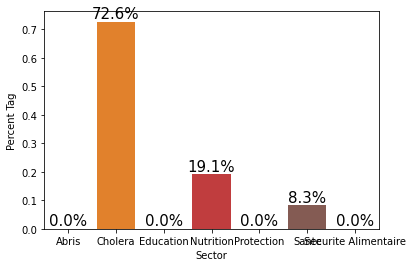

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Verrettes,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Verrettes,Cholera,2434.00,1266.00,1168.00,929.00,1349.00,156.00,0.66,0.25,0.37,0.04
Verrettes,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Verrettes,Nutrition,850.00,408.00,442.00,850.00,0.00,0.00,0.23,0.23,0.00,0.00
Verrettes,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Verrettes,Sante,380.00,188.00,192.00,145.00,211.00,24.00,0.10,0.04,0.06,0.01
Verrettes,Securite Alimentaire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


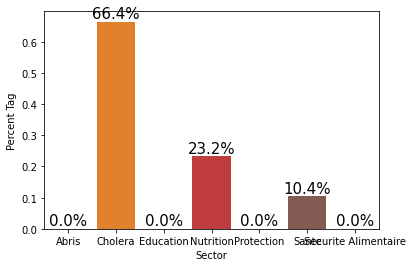

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
La Chapelle,Abris,3000.00,1454.00,1546.00,1244.00,1564.00,192.06,0.46,0.19,0.24,0.03
La Chapelle,Cholera,635.00,330.00,305.00,262.00,332.00,41.00,0.10,0.04,0.05,0.01
La Chapelle,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Chapelle,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Chapelle,Protection,74.00,37.00,37.00,23.00,51.00,0.00,0.01,0.00,0.01,0.00
La Chapelle,Sante,342.00,109.00,233.00,178.00,157.00,7.00,0.05,0.03,0.02,0.00
La Chapelle,Securite Alimentaire,2524.00,1265.00,1260.00,1237.00,1126.00,161.55,0.38,0.19,0.17,0.02


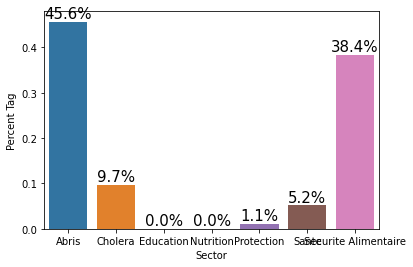

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Dessalines,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dessalines,Cholera,2540.00,1321.00,1219.00,1009.00,1368.00,163.00,0.29,0.11,0.15,0.02
Dessalines,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dessalines,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dessalines,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dessalines,Sante,857.00,424.00,433.00,327.00,475.00,55.00,0.10,0.04,0.05,0.01
Dessalines,Securite Alimentaire,5457.00,2734.00,2723.00,2674.00,2434.00,349.25,0.62,0.30,0.27,0.04


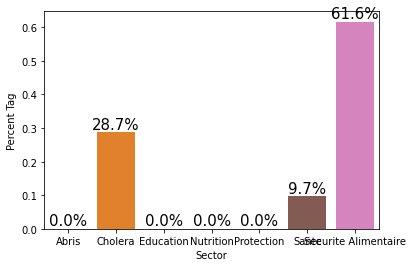

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Petite Rivière de l'Artibonite,Abris,6000.00,2908.00,3092.00,2490.00,3126.00,384.11,0.39,0.16,0.20,0.03
Petite Rivière de l'Artibonite,Cholera,3492.00,1816.00,1676.00,1360.00,1909.00,224.00,0.23,0.09,0.12,0.01
Petite Rivière de l'Artibonite,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petite Rivière de l'Artibonite,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petite Rivière de l'Artibonite,Protection,142.00,71.00,71.00,43.00,99.00,0.00,0.01,0.00,0.01,0.00
Petite Rivière de l'Artibonite,Sante,556.00,156.00,400.00,296.00,253.00,7.00,0.04,0.02,0.02,0.00
Petite Rivière de l'Artibonite,Securite Alimentaire,5122.00,2566.00,2556.00,2510.00,2285.00,327.82,0.33,0.16,0.15,0.02


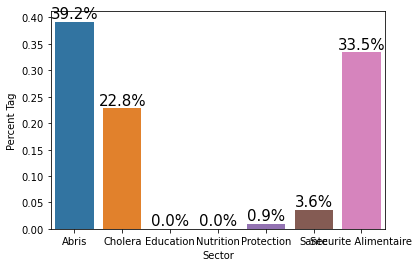

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Grande Saline,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Saline,Cholera,847.00,440.00,406.00,279.00,514.00,54.00,0.50,0.17,0.31,0.03
Grande Saline,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Saline,Nutrition,135.00,65.00,70.00,135.00,0.00,0.00,0.08,0.08,0.00,0.00
Grande Saline,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grande Saline,Sante,5.00,2.00,3.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00
Grande Saline,Securite Alimentaire,697.00,349.00,348.00,342.00,311.00,44.61,0.41,0.20,0.18,0.03


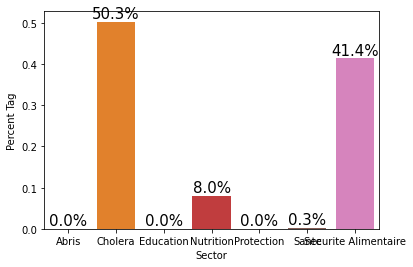

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Desdunes,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Desdunes,Cholera,423.00,220.00,203.00,151.00,246.00,27.00,0.24,0.09,0.14,0.02
Desdunes,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Desdunes,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Desdunes,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Desdunes,Sante,240.00,119.00,121.00,92.00,133.00,15.00,0.14,0.05,0.07,0.01
Desdunes,Securite Alimentaire,1111.00,557.00,554.00,544.00,495.00,71.09,0.63,0.31,0.28,0.04


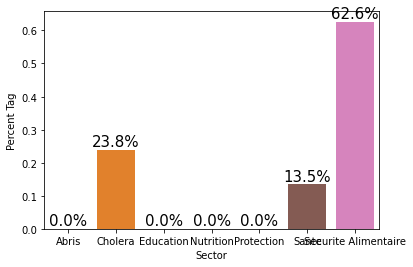

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint-Michel de l'Attalaye,Abris,2200.00,1066.00,1134.00,912.00,1146.00,140.84,0.06,0.02,0.03,0.00
Saint-Michel de l'Attalaye,Cholera,21589.00,11226.00,10363.00,9154.00,11053.00,1382.00,0.55,0.23,0.28,0.03
Saint-Michel de l'Attalaye,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Michel de l'Attalaye,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Michel de l'Attalaye,Protection,124.00,62.00,62.00,39.00,85.00,0.00,0.00,0.00,0.00,0.00
Saint-Michel de l'Attalaye,Sante,576.00,183.00,393.00,302.00,263.00,11.00,0.01,0.01,0.01,0.00
Saint-Michel de l'Attalaye,Securite Alimentaire,15051.00,7541.00,7510.00,7375.00,6713.00,963.27,0.38,0.19,0.17,0.02


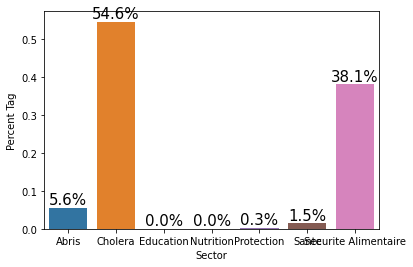

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Marmelade,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marmelade,Cholera,106.00,55.00,51.00,43.00,56.00,7.00,0.03,0.01,0.01,0.00
Marmelade,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marmelade,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marmelade,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marmelade,Sante,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Marmelade,Securite Alimentaire,3806.00,1907.00,1899.00,1865.00,1697.00,243.56,0.97,0.48,0.43,0.06


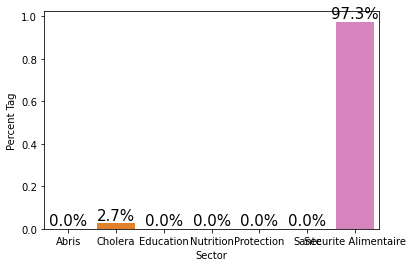

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Hinche,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hinche,Cholera,18943.00,9850.00,9093.00,7931.00,9800.00,1212.00,0.65,0.27,0.34,0.04
Hinche,Education,3525.00,2256.00,1269.00,3525.00,0.00,0.00,0.12,0.12,0.00,0.00
Hinche,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hinche,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hinche,Sante,206.00,105.00,101.00,89.00,104.00,13.00,0.01,0.00,0.00,0.00
Hinche,Securite Alimentaire,6579.00,3296.00,3283.00,3223.00,2934.00,421.03,0.22,0.11,0.10,0.01


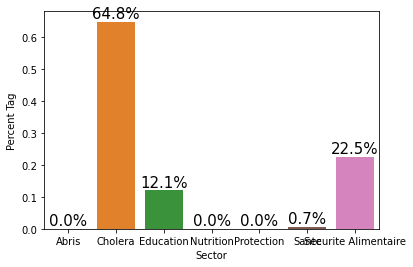

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Maïssade,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maïssade,Cholera,5503.00,2862.00,2641.00,2404.00,2747.00,352.00,0.54,0.23,0.27,0.03
Maïssade,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maïssade,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maïssade,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maïssade,Sante,12.00,6.00,6.00,5.00,6.00,1.00,0.00,0.00,0.00,0.00
Maïssade,Securite Alimentaire,4715.00,2362.00,2353.00,2311.00,2103.00,301.78,0.46,0.23,0.21,0.03


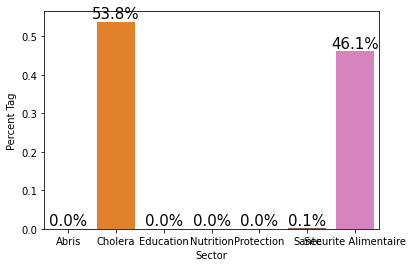

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Thomonde,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomonde,Cholera,529.00,275.00,254.00,235.00,260.00,34.00,0.08,0.04,0.04,0.01
Thomonde,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomonde,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomonde,Protection,546.00,279.00,267.00,235.00,276.00,35.00,0.08,0.04,0.04,0.01
Thomonde,Sante,450.00,119.00,331.00,259.00,189.00,2.00,0.07,0.04,0.03,0.00
Thomonde,Securite Alimentaire,4950.00,2480.00,2470.00,2426.00,2208.00,316.83,0.76,0.37,0.34,0.05


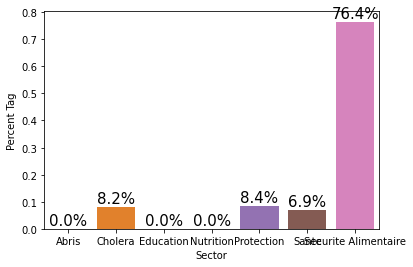

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cerca Carvajal,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Sante,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca Carvajal,Securite Alimentaire,1860.00,932.00,928.00,912.00,830.00,119.06,1.00,0.49,0.45,0.06


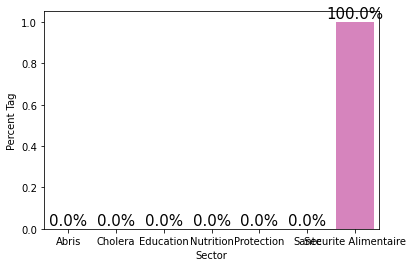

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Mirebalais,Abris,18632.00,9428.00,9204.00,7324.00,10116.00,1192.00,0.38,0.15,0.21,0.02
Mirebalais,Cholera,19578.00,10181.00,9397.00,7695.00,10630.00,1253.00,0.40,0.16,0.22,0.03
Mirebalais,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mirebalais,Nutrition,390.00,187.00,203.00,390.00,0.00,0.00,0.01,0.01,0.00,0.00
Mirebalais,Protection,422.00,211.00,211.00,131.00,291.00,0.00,0.01,0.00,0.01,0.00
Mirebalais,Sante,1736.00,522.00,1214.00,956.00,756.00,24.00,0.04,0.02,0.02,0.00
Mirebalais,Securite Alimentaire,7820.00,3918.00,3902.00,3832.00,3488.00,500.51,0.16,0.08,0.07,0.01


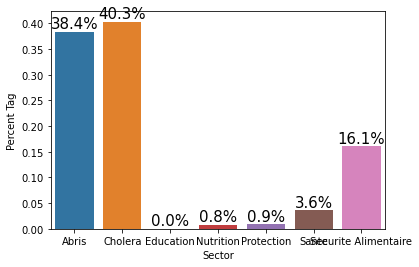

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saut d'Eau,Abris,3734.00,1940.00,1794.00,1556.00,1940.00,238.00,0.49,0.20,0.26,0.03
Saut d'Eau,Cholera,212.00,110.00,102.00,88.00,109.00,14.00,0.03,0.01,0.01,0.00
Saut d'Eau,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saut d'Eau,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saut d'Eau,Protection,84.00,42.00,42.00,27.00,57.00,0.00,0.01,0.00,0.01,0.00
Saut d'Eau,Sante,446.00,156.00,290.00,237.00,198.00,11.00,0.06,0.03,0.03,0.00
Saut d'Eau,Securite Alimentaire,3126.00,1566.00,1560.00,1532.00,1394.00,200.03,0.41,0.20,0.18,0.03


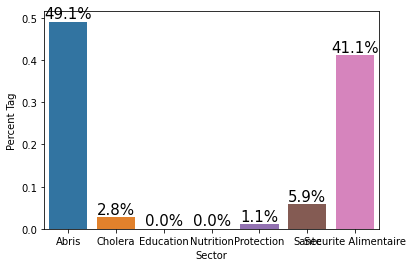

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Boucan Carré,Abris,16170.00,8416.00,7754.00,6924.00,8212.00,1034.00,0.67,0.29,0.34,0.04
Boucan Carré,Cholera,1905.00,991.00,914.00,816.00,967.00,122.00,0.08,0.03,0.04,0.01
Boucan Carré,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Boucan Carré,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Boucan Carré,Protection,366.00,183.00,183.00,119.00,247.00,0.00,0.02,0.00,0.01,0.00
Boucan Carré,Sante,1239.00,324.00,915.00,740.00,497.00,2.00,0.05,0.03,0.02,0.00
Boucan Carré,Securite Alimentaire,4482.00,2246.00,2237.00,2196.00,1999.00,286.86,0.19,0.09,0.08,0.01


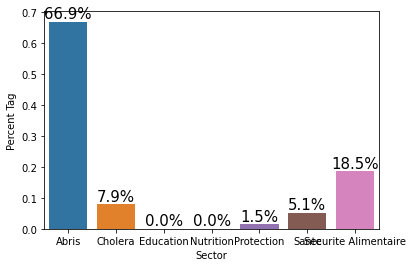

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Lascahobas,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Lascahobas,Cholera,21271.00,11061.00,10210.00,9051.00,10859.00,1361.00,0.83,0.35,0.42,0.05
Lascahobas,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Lascahobas,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Lascahobas,Protection,405.00,207.00,198.00,174.00,205.00,26.00,0.02,0.01,0.01,0.00
Lascahobas,Sante,318.00,81.00,237.00,185.00,132.00,1.00,0.01,0.01,0.01,0.00
Lascahobas,Securite Alimentaire,3670.00,1839.00,1831.00,1798.00,1637.00,234.87,0.14,0.07,0.06,0.01


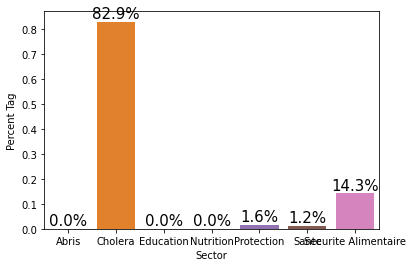

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Belladère,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belladère,Cholera,18308.00,9520.00,8788.00,7962.00,9174.00,1172.00,0.69,0.30,0.34,0.04
Belladère,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belladère,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belladère,Protection,764.00,390.00,374.00,329.00,386.00,49.00,0.03,0.01,0.01,0.00
Belladère,Sante,650.00,177.00,473.00,371.00,275.00,4.00,0.02,0.01,0.01,0.00
Belladère,Securite Alimentaire,6929.00,3471.00,3458.00,3395.00,3090.00,443.45,0.26,0.13,0.12,0.02


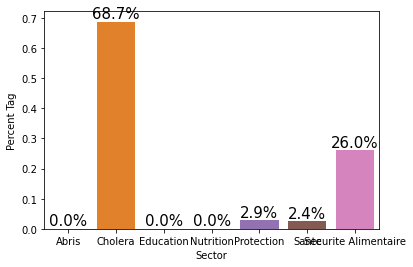

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Savanette,Abris,3274.00,1664.00,1610.00,1312.00,1752.00,210.00,0.41,0.16,0.22,0.03
Savanette,Cholera,741.00,385.00,356.00,297.00,397.00,47.00,0.09,0.04,0.05,0.01
Savanette,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Savanette,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Savanette,Protection,369.00,188.00,181.00,137.00,211.00,21.00,0.05,0.02,0.03,0.00
Savanette,Sante,754.00,257.00,497.00,398.00,338.00,18.00,0.09,0.05,0.04,0.00
Savanette,Securite Alimentaire,2896.00,1451.00,1445.00,1419.00,1292.00,185.34,0.36,0.18,0.16,0.02


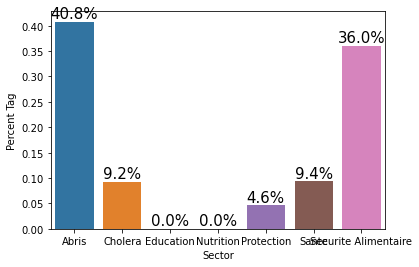

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cerca La Source,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca La Source,Cholera,1482.00,770.00,711.00,695.00,691.00,95.00,0.22,0.10,0.10,0.01
Cerca La Source,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca La Source,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerca La Source,Protection,499.00,255.00,244.00,215.00,252.00,32.00,0.07,0.03,0.04,0.00
Cerca La Source,Sante,385.00,96.00,289.00,226.00,159.00,0.00,0.06,0.03,0.02,0.00
Cerca La Source,Securite Alimentaire,4523.00,2266.00,2257.00,2216.00,2017.00,289.44,0.66,0.32,0.29,0.04


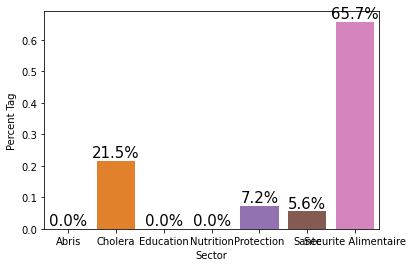

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Thomassique,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomassique,Cholera,741.00,385.00,356.00,350.00,344.00,47.00,0.11,0.05,0.05,0.01
Thomassique,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomassique,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Thomassique,Protection,558.00,285.00,273.00,240.00,282.00,36.00,0.08,0.04,0.04,0.01
Thomassique,Sante,428.00,106.00,322.00,251.00,177.00,0.00,0.06,0.04,0.03,0.00
Thomassique,Securite Alimentaire,5058.00,2534.00,2524.00,2478.00,2256.00,323.71,0.75,0.37,0.33,0.05


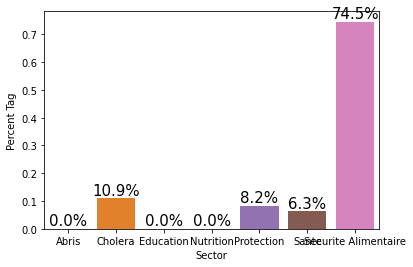

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Les Cayes,Abris,36854.00,18094.00,18760.00,12714.00,21782.00,2358.00,0.55,0.19,0.33,0.04
Les Cayes,Cholera,1058.00,550.00,508.00,365.00,625.00,68.00,0.02,0.01,0.01,0.00
Les Cayes,Education,19281.00,9655.00,9626.00,19281.00,0.00,0.00,0.29,0.29,0.00,0.00
Les Cayes,Nutrition,600.00,288.00,312.00,600.00,0.00,0.00,0.01,0.01,0.00,0.00
Les Cayes,Protection,836.00,418.00,418.00,237.00,599.00,0.00,0.01,0.00,0.01,0.00
Les Cayes,Sante,4908.00,1231.00,3677.00,2679.00,2209.00,20.00,0.07,0.04,0.03,0.00
Les Cayes,Securite Alimentaire,3183.00,1595.00,1588.00,1560.00,1419.00,203.69,0.05,0.02,0.02,0.00


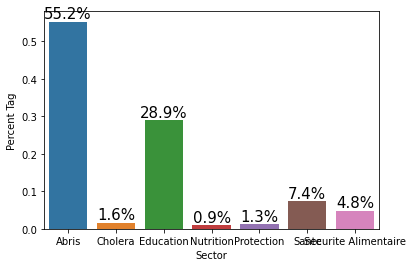

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Torbeck,Abris,19630.00,10304.00,9326.00,7568.00,10806.00,1256.00,0.75,0.29,0.41,0.05
Torbeck,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Torbeck,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Torbeck,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Torbeck,Protection,430.00,215.00,215.00,133.00,297.00,0.00,0.02,0.01,0.01,0.00
Torbeck,Sante,2371.00,621.00,1750.00,1342.00,1020.00,9.00,0.09,0.05,0.04,0.00
Torbeck,Securite Alimentaire,3804.00,1906.00,1898.00,1864.00,1697.00,243.47,0.14,0.07,0.06,0.01


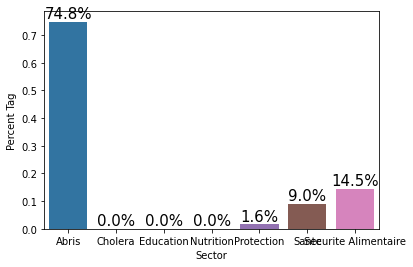

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Chantal,Abris,5888.00,3096.00,2792.00,2350.00,3162.00,376.00,0.61,0.25,0.33,0.04
Chantal,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chantal,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chantal,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chantal,Protection,130.00,65.00,65.00,41.00,89.00,0.00,0.01,0.00,0.01,0.00
Chantal,Sante,1051.00,307.00,744.00,577.00,463.00,11.00,0.11,0.06,0.05,0.00
Chantal,Securite Alimentaire,2514.00,1260.00,1255.00,1232.00,1121.00,160.91,0.26,0.13,0.12,0.02


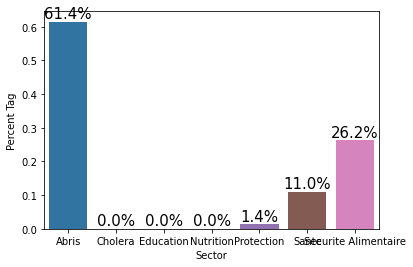

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Camp-Perrin,Abris,3870.00,2036.00,1834.00,1446.00,2176.00,248.00,0.55,0.21,0.31,0.04
Camp-Perrin,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Camp-Perrin,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Camp-Perrin,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Camp-Perrin,Protection,84.00,42.00,42.00,26.00,58.00,0.00,0.01,0.00,0.01,0.00
Camp-Perrin,Sante,809.00,209.00,600.00,460.00,347.00,2.00,0.12,0.07,0.05,0.00
Camp-Perrin,Securite Alimentaire,2252.00,1128.00,1124.00,1104.00,1004.00,144.14,0.32,0.16,0.14,0.02


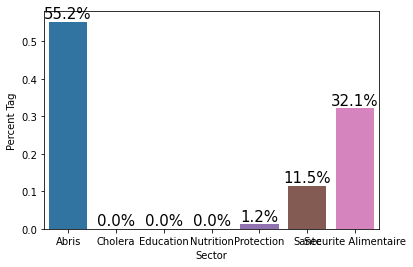

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Maniche,Abris,3808.00,2034.00,1774.00,1540.00,2024.00,244.00,0.66,0.27,0.35,0.04
Maniche,Cholera,106.00,55.00,51.00,43.00,56.00,7.00,0.02,0.01,0.01,0.00
Maniche,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maniche,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Maniche,Protection,84.00,42.00,42.00,27.00,57.00,0.00,0.01,0.00,0.01,0.00
Maniche,Sante,546.00,138.00,408.00,318.00,228.00,0.00,0.10,0.06,0.04,0.00
Maniche,Securite Alimentaire,1197.00,600.00,597.00,586.00,534.00,76.59,0.21,0.10,0.09,0.01


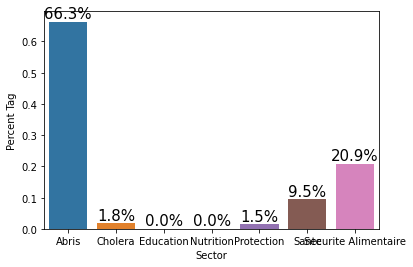

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Île à Vache,Abris,3974.00,2136.00,1838.00,1754.00,1966.00,254.00,0.64,0.28,0.32,0.04
Île à Vache,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Île à Vache,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Île à Vache,Nutrition,60.00,29.00,31.00,60.00,0.00,0.00,0.01,0.01,0.00,0.00
Île à Vache,Protection,88.00,44.00,44.00,29.00,59.00,0.00,0.01,0.00,0.01,0.00
Île à Vache,Sante,537.00,139.00,398.00,319.00,218.00,0.00,0.09,0.05,0.04,0.00
Île à Vache,Securite Alimentaire,1540.00,771.00,768.00,755.00,687.00,98.55,0.25,0.12,0.11,0.02


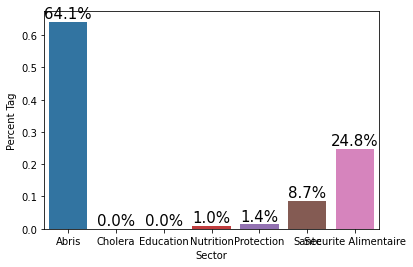

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Port-Salut,Abris,3388.00,1788.00,1600.00,1336.00,1836.00,216.00,0.55,0.22,0.30,0.03
Port-Salut,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Salut,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Salut,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-Salut,Protection,74.00,37.00,37.00,23.00,51.00,0.00,0.01,0.00,0.01,0.00
Port-Salut,Sante,834.00,287.00,547.00,429.00,386.00,19.00,0.13,0.07,0.06,0.00
Port-Salut,Securite Alimentaire,1910.00,957.00,953.00,936.00,852.00,122.23,0.31,0.15,0.14,0.02


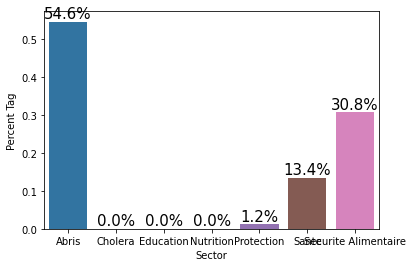

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint Jean du Sud,Abris,2650.00,1440.00,1210.00,1040.00,1440.00,170.00,0.44,0.17,0.24,0.03
Saint Jean du Sud,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint Jean du Sud,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint Jean du Sud,Nutrition,100.00,48.00,52.00,100.00,0.00,0.00,0.02,0.02,0.00,0.00
Saint Jean du Sud,Protection,56.00,28.00,28.00,18.00,38.00,0.00,0.01,0.00,0.01,0.00
Saint Jean du Sud,Sante,598.00,153.00,445.00,346.00,251.00,1.00,0.10,0.06,0.04,0.00
Saint Jean du Sud,Securite Alimentaire,2557.00,1281.00,1276.00,1253.00,1140.00,163.63,0.43,0.21,0.19,0.03


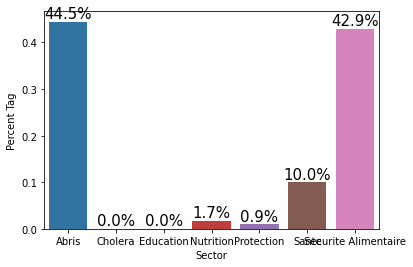

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Arniquet,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arniquet,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arniquet,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arniquet,Nutrition,115.00,55.00,60.00,115.00,0.00,0.00,0.03,0.03,0.00,0.00
Arniquet,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arniquet,Sante,462.00,116.00,346.00,267.00,195.00,0.00,0.13,0.08,0.06,0.00
Arniquet,Securite Alimentaire,2918.00,1462.00,1456.00,1430.00,1301.00,186.75,0.83,0.41,0.37,0.05


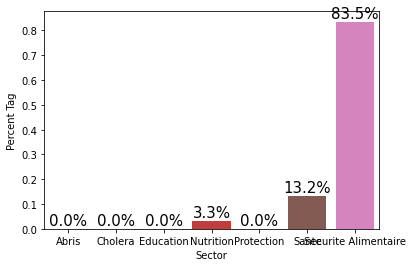

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Aquin,Abris,18840.00,9604.00,9236.00,7076.00,10558.00,1206.00,0.58,0.22,0.32,0.04
Aquin,Cholera,106.00,55.00,51.00,40.00,59.00,7.00,0.00,0.00,0.00,0.00
Aquin,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Aquin,Nutrition,400.00,192.00,208.00,400.00,0.00,0.00,0.01,0.01,0.00,0.00
Aquin,Protection,422.00,211.00,211.00,127.00,295.00,0.00,0.01,0.00,0.01,0.00
Aquin,Sante,2794.00,695.00,2099.00,1586.00,1204.00,4.00,0.09,0.05,0.04,0.00
Aquin,Securite Alimentaire,9941.00,4980.00,4961.00,4871.00,4434.00,636.22,0.31,0.15,0.14,0.02


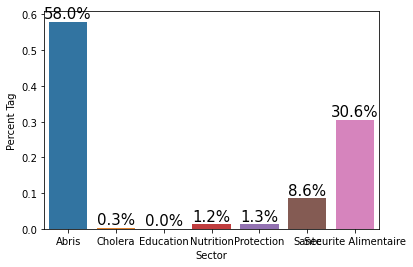

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint louis du Sud,Abris,11920.00,6064.00,5856.00,5006.00,6152.00,762.00,0.67,0.28,0.35,0.04
Saint louis du Sud,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint louis du Sud,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint louis du Sud,Nutrition,250.00,120.00,130.00,250.00,0.00,0.00,0.01,0.01,0.00,0.00
Saint louis du Sud,Protection,274.00,137.00,137.00,87.00,187.00,0.00,0.02,0.00,0.01,0.00
Saint louis du Sud,Sante,2033.00,619.00,1414.00,1104.00,902.00,27.00,0.11,0.06,0.05,0.00
Saint louis du Sud,Securite Alimentaire,3246.00,1626.00,1620.00,1591.00,1448.00,207.76,0.18,0.09,0.08,0.01


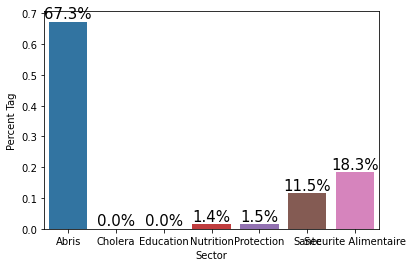

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Cavaillon,Abris,11614.00,6118.00,5496.00,4380.00,6490.00,744.00,0.73,0.28,0.41,0.05
Cavaillon,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cavaillon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cavaillon,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cavaillon,Protection,252.00,126.00,126.00,77.00,175.00,0.00,0.02,0.00,0.01,0.00
Cavaillon,Sante,1503.00,409.00,1094.00,836.00,657.00,10.00,0.10,0.05,0.04,0.00
Cavaillon,Securite Alimentaire,2434.00,1220.00,1215.00,1193.00,1086.00,155.80,0.15,0.08,0.07,0.01


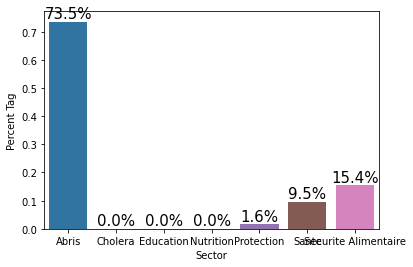

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Côteaux,Abris,5496.00,2870.00,2626.00,2226.00,2918.00,352.00,0.64,0.26,0.34,0.04
Côteaux,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Côteaux,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Côteaux,Nutrition,85.00,41.00,44.00,85.00,0.00,0.00,0.01,0.01,0.00,0.00
Côteaux,Protection,122.00,61.00,61.00,39.00,83.00,0.00,0.01,0.00,0.01,0.00
Côteaux,Sante,757.00,196.00,561.00,435.00,320.00,2.00,0.09,0.05,0.04,0.00
Côteaux,Securite Alimentaire,2130.00,1067.00,1063.00,1044.00,950.00,136.33,0.25,0.12,0.11,0.02


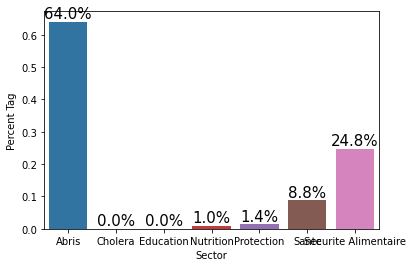

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Port-à-Piment,Abris,3198.00,1638.00,1560.00,1674.00,1320.00,204.00,0.50,0.26,0.21,0.03
Port-à-Piment,Cholera,212.00,110.00,102.00,111.00,87.00,14.00,0.03,0.02,0.01,0.00
Port-à-Piment,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-à-Piment,Nutrition,75.00,36.00,39.00,75.00,0.00,0.00,0.01,0.01,0.00,0.00
Port-à-Piment,Protection,78.00,39.00,39.00,27.00,51.00,0.00,0.01,0.00,0.01,0.00
Port-à-Piment,Sante,1271.00,526.00,745.00,609.00,614.00,48.00,0.20,0.10,0.10,0.01
Port-à-Piment,Securite Alimentaire,1566.00,784.00,781.00,767.00,698.00,100.20,0.24,0.12,0.11,0.02


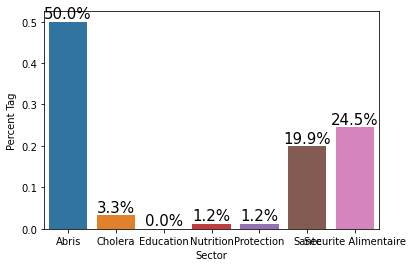

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Roche à Bâteau,Abris,3396.00,1778.00,1618.00,1476.00,1702.00,218.00,0.57,0.25,0.28,0.04
Roche à Bâteau,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Roche à Bâteau,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Roche à Bâteau,Nutrition,75.00,36.00,39.00,75.00,0.00,0.00,0.01,0.01,0.00,0.00
Roche à Bâteau,Protection,76.00,38.00,38.00,25.00,51.00,0.00,0.01,0.00,0.01,0.00
Roche à Bâteau,Sante,591.00,174.00,417.00,330.00,255.00,6.00,0.10,0.06,0.04,0.00
Roche à Bâteau,Securite Alimentaire,1839.00,922.00,918.00,901.00,820.00,117.72,0.31,0.15,0.14,0.02


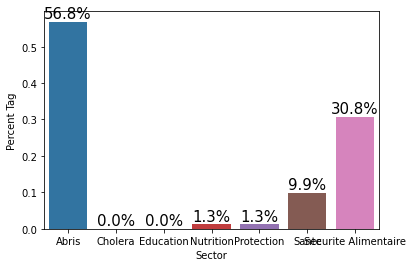

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Chardonnières,Abris,2426.00,1302.00,1124.00,1064.00,1206.00,156.00,0.45,0.20,0.22,0.03
Chardonnières,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chardonnières,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chardonnières,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chardonnières,Protection,54.00,27.00,27.00,18.00,36.00,0.00,0.01,0.00,0.01,0.00
Chardonnières,Sante,844.00,300.00,544.00,432.00,391.00,21.00,0.16,0.08,0.07,0.00
Chardonnières,Securite Alimentaire,2040.00,1022.00,1018.00,1000.00,910.00,130.56,0.38,0.19,0.17,0.02


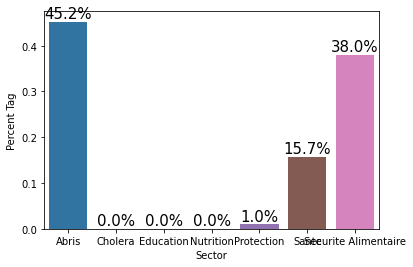

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Les Anglais,Abris,6706.00,3538.00,3168.00,2896.00,3380.00,430.00,0.54,0.23,0.27,0.03
Les Anglais,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Les Anglais,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Les Anglais,Nutrition,120.00,58.00,62.00,120.00,0.00,0.00,0.01,0.01,0.00,0.00
Les Anglais,Protection,150.00,75.00,75.00,49.00,101.00,0.00,0.01,0.00,0.01,0.00
Les Anglais,Sante,2477.00,1027.00,1450.00,1159.00,1221.00,97.00,0.20,0.09,0.10,0.01
Les Anglais,Securite Alimentaire,2989.00,1498.00,1492.00,1465.00,1333.00,191.30,0.24,0.12,0.11,0.02


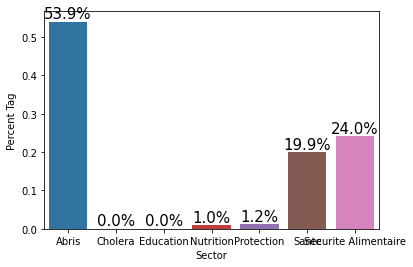

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Tiburon,Abris,6006.00,3180.00,2826.00,2528.00,3094.00,384.00,0.62,0.26,0.32,0.04
Tiburon,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tiburon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tiburon,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tiburon,Protection,134.00,67.00,67.00,43.00,91.00,0.00,0.01,0.00,0.01,0.00
Tiburon,Sante,1224.00,435.00,789.00,627.00,567.00,30.00,0.13,0.06,0.06,0.00
Tiburon,Securite Alimentaire,2328.00,1166.00,1162.00,1141.00,1038.00,148.99,0.24,0.12,0.11,0.02


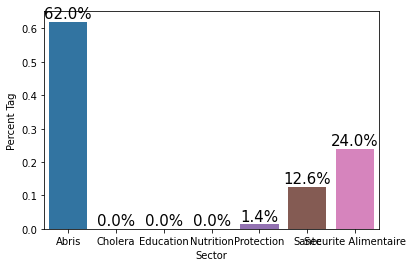

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Jérémie,Abris,20106.00,10276.00,9830.00,7356.00,11464.00,1286.21,0.34,0.12,0.19,0.02
Jérémie,Cholera,106.00,55.00,51.00,39.00,60.00,7.00,0.00,0.00,0.00,0.00
Jérémie,Education,11569.00,5606.00,5963.00,11569.00,0.00,0.00,0.20,0.20,0.00,0.00
Jérémie,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jérémie,Protection,440.00,220.00,220.00,134.00,306.00,0.00,0.01,0.00,0.01,0.00
Jérémie,Sante,6004.00,1960.00,4044.00,3162.00,2732.00,110.00,0.10,0.05,0.05,0.00
Jérémie,Securite Alimentaire,20860.00,10451.00,10409.00,10221.00,9303.00,1335.02,0.35,0.17,0.16,0.02


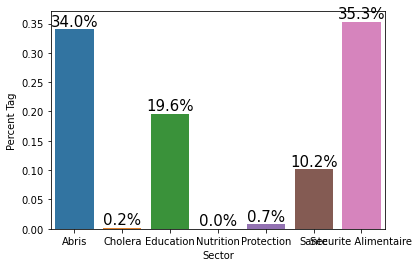

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Abricots,Abris,7362.00,3894.00,3468.00,3234.00,3656.00,472.00,0.48,0.21,0.24,0.03
Abricots,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Abricots,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Abricots,Nutrition,175.00,84.00,91.00,175.00,0.00,0.00,0.01,0.01,0.00,0.00
Abricots,Protection,166.00,83.00,83.00,55.00,111.00,0.00,0.01,0.00,0.01,0.00
Abricots,Sante,1905.00,647.00,1258.00,1012.00,855.00,38.00,0.12,0.07,0.06,0.00
Abricots,Securite Alimentaire,5651.00,2831.00,2820.00,2769.00,2520.00,361.68,0.37,0.18,0.17,0.02


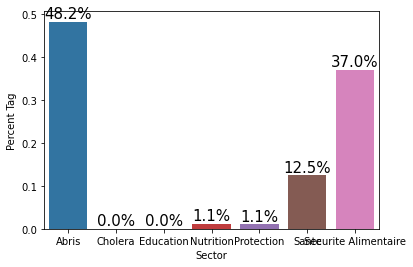

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bonbon,Abris,70.00,38.00,32.00,28.00,38.00,4.00,0.03,0.01,0.02,0.00
Bonbon,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bonbon,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bonbon,Nutrition,40.00,19.00,21.00,40.00,0.00,0.00,0.02,0.02,0.00,0.00
Bonbon,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bonbon,Sante,670.00,303.00,367.00,299.00,339.00,32.00,0.32,0.14,0.16,0.02
Bonbon,Securite Alimentaire,1292.00,647.00,644.00,633.00,576.00,82.66,0.62,0.31,0.28,0.04


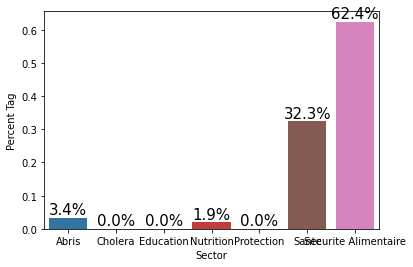

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Moron,Abris,70.00,36.00,34.00,30.00,36.00,4.00,0.01,0.00,0.00,0.00
Moron,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Moron,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Moron,Nutrition,150.00,72.00,78.00,150.00,0.00,0.00,0.02,0.02,0.00,0.00
Moron,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Moron,Sante,781.00,226.00,555.00,434.00,340.00,7.00,0.08,0.04,0.03,0.00
Moron,Securite Alimentaire,8816.00,4417.00,4399.00,4320.00,3932.00,564.26,0.90,0.44,0.40,0.06


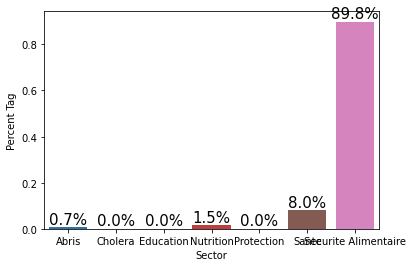

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Chambellan,Abris,34.00,18.00,16.00,14.00,18.00,2.00,0.00,0.00,0.00,0.00
Chambellan,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chambellan,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chambellan,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chambellan,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chambellan,Sante,723.00,217.00,506.00,397.00,318.00,8.00,0.06,0.04,0.03,0.00
Chambellan,Securite Alimentaire,10451.00,5236.00,5215.00,5121.00,4661.00,668.88,0.93,0.46,0.42,0.06


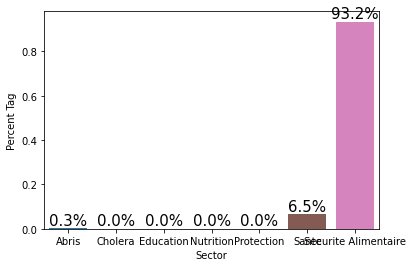

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse d'Hainault,Abris,272.00,144.00,128.00,116.00,138.00,18.00,0.03,0.01,0.01,0.00
Anse d'Hainault,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse d'Hainault,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse d'Hainault,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse d'Hainault,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse d'Hainault,Sante,2191.00,932.00,1259.00,1018.00,1083.00,90.00,0.23,0.10,0.11,0.01
Anse d'Hainault,Securite Alimentaire,7246.00,3630.00,3616.00,3551.00,3232.00,463.77,0.75,0.37,0.33,0.05


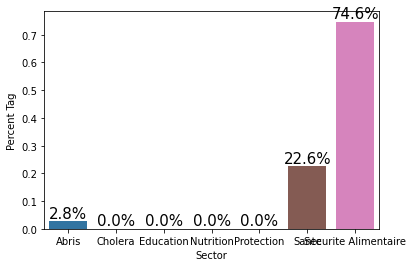

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Dame Marie,Abris,2402.00,1242.00,1160.00,928.00,1320.00,154.00,0.22,0.09,0.12,0.01
Dame Marie,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dame Marie,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dame Marie,Nutrition,180.00,86.00,94.00,180.00,0.00,0.00,0.02,0.02,0.00,0.00
Dame Marie,Protection,54.00,27.00,27.00,17.00,37.00,0.00,0.00,0.00,0.00,0.00
Dame Marie,Sante,2415.00,1002.00,1413.00,1141.00,1181.00,93.00,0.22,0.11,0.11,0.01
Dame Marie,Securite Alimentaire,5812.00,2912.00,2900.00,2848.00,2592.00,371.97,0.54,0.26,0.24,0.03


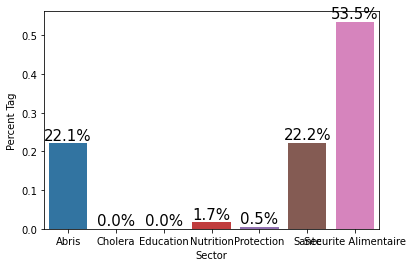

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Les Irois,Abris,9958.00,5394.00,4564.00,4422.00,4898.00,638.00,0.61,0.27,0.30,0.04
Les Irois,Cholera,106.00,55.00,51.00,47.00,52.00,7.00,0.01,0.00,0.00,0.00
Les Irois,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Les Irois,Nutrition,110.00,53.00,57.00,110.00,0.00,0.00,0.01,0.01,0.00,0.00
Les Irois,Protection,220.00,110.00,110.00,74.00,146.00,0.00,0.01,0.00,0.01,0.00
Les Irois,Sante,2375.00,926.00,1449.00,1191.00,1109.00,75.00,0.15,0.07,0.07,0.00
Les Irois,Securite Alimentaire,3506.00,1757.00,1750.00,1718.00,1564.00,224.39,0.22,0.11,0.10,0.01


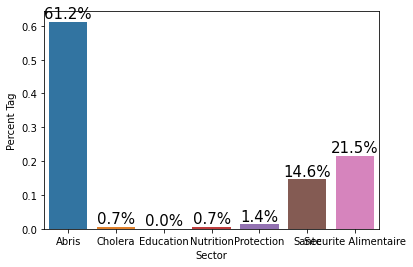

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Corail,Abris,138.00,72.00,66.00,56.00,74.00,8.00,0.03,0.01,0.01,0.00
Corail,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Corail,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Corail,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Corail,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Corail,Sante,892.00,351.00,541.00,433.00,429.00,30.00,0.16,0.08,0.08,0.01
Corail,Securite Alimentaire,4410.00,2209.00,2201.00,2161.00,1967.00,282.24,0.81,0.40,0.36,0.05


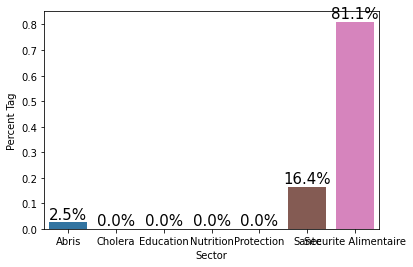

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Roseaux,Abris,3612.00,1918.00,1694.00,1440.00,1940.00,232.00,0.25,0.10,0.13,0.02
Roseaux,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Roseaux,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Roseaux,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Roseaux,Protection,82.00,41.00,41.00,26.00,56.00,0.00,0.01,0.00,0.00,0.00
Roseaux,Sante,2490.00,1021.00,1469.00,1185.00,1212.00,93.00,0.17,0.08,0.08,0.01
Roseaux,Securite Alimentaire,8240.00,4128.00,4112.00,4037.00,3675.00,527.34,0.57,0.28,0.25,0.04


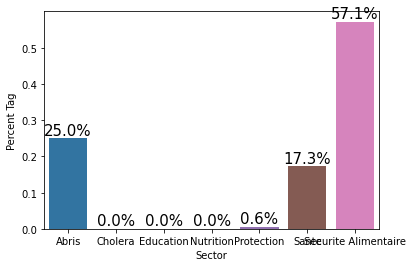

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Beaumont,Abris,184.00,96.00,88.00,72.00,100.00,12.00,0.01,0.01,0.01,0.00
Beaumont,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Beaumont,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Beaumont,Nutrition,150.00,72.00,78.00,150.00,0.00,0.00,0.01,0.01,0.00,0.00
Beaumont,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Beaumont,Sante,798.00,225.00,573.00,448.00,344.00,6.00,0.06,0.03,0.03,0.00
Beaumont,Securite Alimentaire,12474.00,6250.00,6225.00,6112.00,5563.00,798.34,0.92,0.45,0.41,0.06


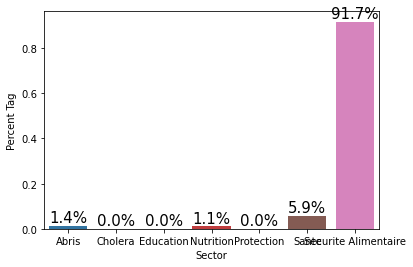

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Pestel,Abris,388.00,206.00,182.00,160.00,202.00,25.87,0.03,0.01,0.01,0.00
Pestel,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pestel,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pestel,Nutrition,210.00,101.00,109.00,210.00,0.00,0.00,0.01,0.01,0.00,0.00
Pestel,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pestel,Sante,1337.00,437.00,900.00,709.00,604.00,24.00,0.10,0.05,0.04,0.00
Pestel,Securite Alimentaire,12112.00,6068.00,6044.00,5935.00,5402.00,775.14,0.86,0.42,0.38,0.06


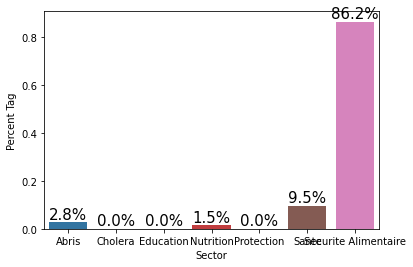

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Port-de-Paix,Abris,6210.00,3026.00,3184.00,2452.00,3340.00,417.48,0.16,0.06,0.09,0.01
Port-de-Paix,Cholera,8360.00,4347.00,4013.00,3272.00,4553.00,535.00,0.22,0.09,0.12,0.01
Port-de-Paix,Education,4832.00,2465.00,2368.00,4832.00,0.00,0.00,0.13,0.13,0.00,0.00
Port-de-Paix,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-de-Paix,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Port-de-Paix,Sante,515.00,255.00,260.00,213.00,269.00,33.00,0.01,0.01,0.01,0.00
Port-de-Paix,Securite Alimentaire,17860.00,8948.00,8912.00,8752.00,7966.00,1143.06,0.47,0.23,0.21,0.03


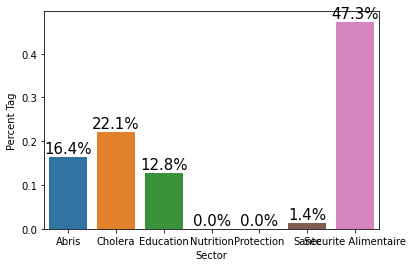

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
La Tortue,Abris,350.00,170.00,180.00,138.00,188.00,23.53,0.02,0.01,0.01,0.00
La Tortue,Cholera,212.00,110.00,102.00,95.00,102.00,14.00,0.01,0.01,0.01,0.00
La Tortue,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Tortue,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Tortue,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
La Tortue,Sante,2.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
La Tortue,Securite Alimentaire,14226.00,7127.00,7099.00,6971.00,6345.00,910.44,0.96,0.47,0.43,0.06


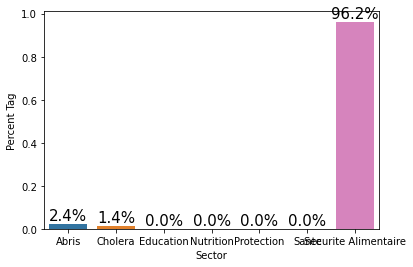

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bassin Bleu,Abris,440.00,214.00,226.00,174.00,236.00,29.58,0.04,0.01,0.02,0.00
Bassin Bleu,Cholera,2963.00,1541.00,1422.00,1272.00,1501.00,190.00,0.24,0.10,0.12,0.02
Bassin Bleu,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bassin Bleu,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bassin Bleu,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bassin Bleu,Sante,3.00,1.00,2.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00
Bassin Bleu,Securite Alimentaire,8945.00,4481.00,4463.00,4383.00,3989.00,572.46,0.72,0.35,0.32,0.05


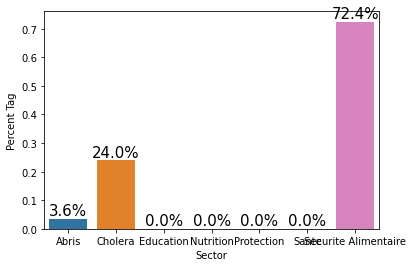

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Chamsolme,Abris,1310.00,638.00,672.00,518.00,704.00,88.07,0.10,0.04,0.05,0.01
Chamsolme,Cholera,635.00,330.00,305.00,289.00,305.00,41.00,0.05,0.02,0.02,0.00
Chamsolme,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chamsolme,Nutrition,100.00,48.00,52.00,100.00,0.00,0.00,0.01,0.01,0.00,0.00
Chamsolme,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chamsolme,Sante,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Chamsolme,Securite Alimentaire,11112.00,5567.00,5545.00,5445.00,4956.00,711.18,0.84,0.41,0.38,0.05


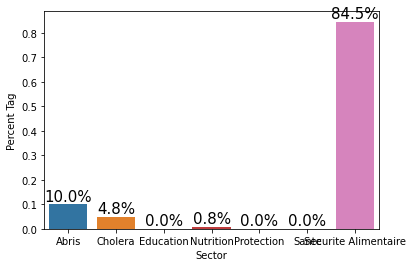

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Saint-Louis du Nord,Abris,7770.00,3788.00,3982.00,3068.00,4178.00,522.35,0.12,0.05,0.07,0.01
Saint-Louis du Nord,Cholera,13334.00,6934.00,6400.00,5544.00,6937.00,853.00,0.21,0.09,0.11,0.01
Saint-Louis du Nord,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Louis du Nord,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Louis du Nord,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Saint-Louis du Nord,Sante,69.00,34.00,35.00,29.00,36.00,4.00,0.00,0.00,0.00,0.00
Saint-Louis du Nord,Securite Alimentaire,42584.00,21335.00,21249.00,20866.00,18993.00,2725.38,0.67,0.33,0.30,0.04


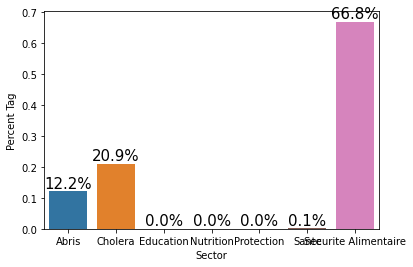

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse-à-Foleur,Abris,370.00,180.00,190.00,146.00,198.00,24.87,0.02,0.01,0.01,0.00
Anse-à-Foleur,Cholera,6350.00,3302.00,3048.00,2836.00,3107.00,406.00,0.36,0.16,0.17,0.02
Anse-à-Foleur,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Foleur,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Foleur,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Foleur,Sante,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Foleur,Securite Alimentaire,11059.00,5541.00,5519.00,5419.00,4933.00,707.80,0.62,0.30,0.28,0.04


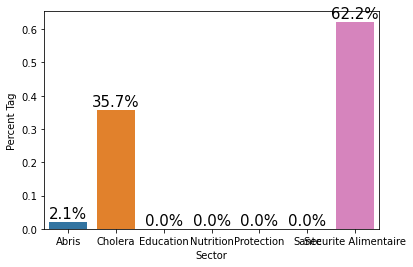

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Môle Saint Nicolas,Abris,30.00,14.00,16.00,12.00,16.00,2.02,0.01,0.01,0.01,0.00
Môle Saint Nicolas,Cholera,423.00,220.00,203.00,179.00,217.00,27.00,0.20,0.08,0.10,0.01
Môle Saint Nicolas,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Môle Saint Nicolas,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Môle Saint Nicolas,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Môle Saint Nicolas,Sante,9.00,4.00,5.00,3.00,5.00,1.00,0.00,0.00,0.00,0.00
Môle Saint Nicolas,Securite Alimentaire,1693.00,848.00,845.00,830.00,755.00,108.36,0.79,0.39,0.35,0.05


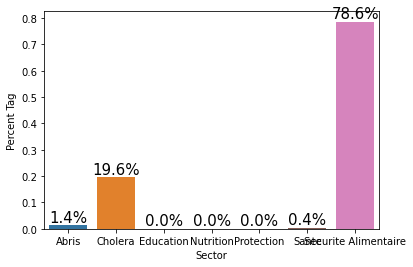

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Baie de Henne,Abris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baie de Henne,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baie de Henne,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baie de Henne,Nutrition,90.00,43.00,47.00,90.00,0.00,0.00,0.06,0.06,0.00,0.00
Baie de Henne,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baie de Henne,Sante,4.00,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00
Baie de Henne,Securite Alimentaire,1364.00,683.00,681.00,668.00,608.00,87.31,0.94,0.46,0.42,0.06


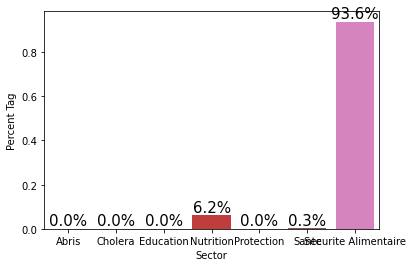

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Bombardopolis,Abris,30.00,14.00,16.00,12.00,16.00,2.02,0.02,0.01,0.01,0.00
Bombardopolis,Cholera,106.00,55.00,51.00,45.00,54.00,7.00,0.05,0.02,0.03,0.00
Bombardopolis,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bombardopolis,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bombardopolis,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bombardopolis,Sante,14.00,7.00,7.00,6.00,7.00,1.00,0.01,0.00,0.00,0.00
Bombardopolis,Securite Alimentaire,1801.00,903.00,899.00,883.00,803.00,115.29,0.92,0.45,0.41,0.06


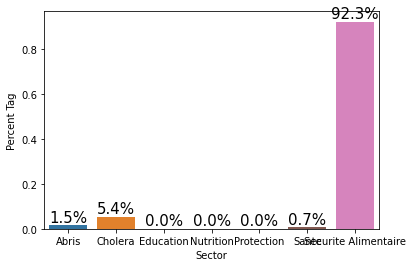

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Jean Rabel,Abris,1020.00,498.00,522.00,402.00,548.00,68.57,0.09,0.04,0.05,0.01
Jean Rabel,Cholera,2434.00,1266.00,1168.00,962.00,1316.00,156.00,0.22,0.09,0.12,0.01
Jean Rabel,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jean Rabel,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jean Rabel,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jean Rabel,Sante,103.00,51.00,52.00,42.00,54.00,7.00,0.01,0.00,0.00,0.00
Jean Rabel,Securite Alimentaire,7421.00,3718.00,3703.00,3636.00,3310.00,474.93,0.68,0.33,0.30,0.04


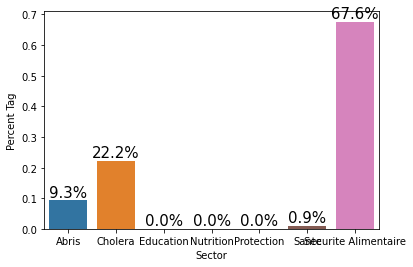

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Miragoâne,Abris,11878.00,6014.00,5864.00,4494.00,6624.00,760.00,0.35,0.13,0.19,0.02
Miragoâne,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Miragoâne,Education,8814.00,4371.00,4443.00,8814.00,0.00,0.00,0.26,0.26,0.00,0.00
Miragoâne,Nutrition,310.00,149.00,161.00,310.00,0.00,0.00,0.01,0.01,0.00,0.00
Miragoâne,Protection,268.00,134.00,134.00,80.00,188.00,0.00,0.01,0.00,0.01,0.00
Miragoâne,Sante,950.00,258.00,692.00,520.00,423.00,7.00,0.03,0.02,0.01,0.00
Miragoâne,Securite Alimentaire,12095.00,6060.00,6036.00,5927.00,5395.00,774.10,0.35,0.17,0.16,0.02


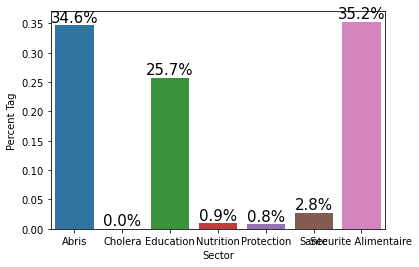

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Petite Rivière de Nippes,Abris,4350.00,2294.00,2056.00,1710.00,2362.00,278.00,0.32,0.13,0.18,0.02
Petite Rivière de Nippes,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petite Rivière de Nippes,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petite Rivière de Nippes,Nutrition,140.00,67.00,73.00,140.00,0.00,0.00,0.01,0.01,0.00,0.00
Petite Rivière de Nippes,Protection,96.00,48.00,48.00,30.00,66.00,0.00,0.01,0.00,0.00,0.00
Petite Rivière de Nippes,Sante,399.00,125.00,274.00,214.00,179.00,6.00,0.03,0.02,0.01,0.00
Petite Rivière de Nippes,Securite Alimentaire,8509.00,4263.00,4246.00,4169.00,3795.00,544.56,0.63,0.31,0.28,0.04


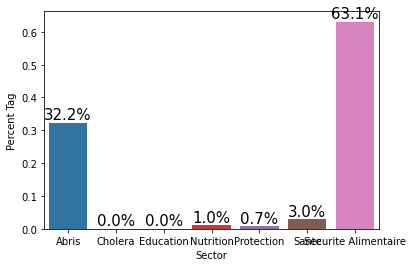

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Fonds des Nègres,Abris,2130.00,1066.00,1064.00,806.00,1188.00,136.00,0.50,0.19,0.28,0.03
Fonds des Nègres,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fonds des Nègres,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fonds des Nègres,Nutrition,165.00,79.00,86.00,165.00,0.00,0.00,0.04,0.04,0.00,0.00
Fonds des Nègres,Protection,48.00,24.00,24.00,14.00,34.00,0.00,0.01,0.00,0.01,0.00
Fonds des Nègres,Sante,254.00,90.00,164.00,124.00,123.00,7.00,0.06,0.03,0.03,0.00
Fonds des Nègres,Securite Alimentaire,1671.00,837.00,834.00,819.00,745.00,106.92,0.39,0.19,0.17,0.03


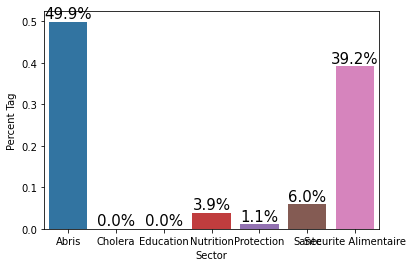

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Paillant,Abris,120.00,60.00,60.00,46.00,66.00,8.00,0.12,0.05,0.07,0.01
Paillant,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Paillant,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Paillant,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Paillant,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Paillant,Sante,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Paillant,Securite Alimentaire,867.00,434.00,432.00,425.00,387.00,55.46,0.88,0.43,0.39,0.06


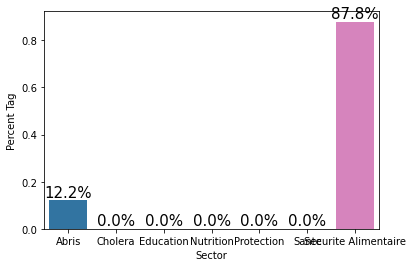

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Anse-à-Veau,Abris,7754.00,4104.00,3650.00,3044.00,4214.00,496.00,0.41,0.16,0.22,0.03
Anse-à-Veau,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Veau,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Anse-à-Veau,Nutrition,170.00,82.00,88.00,170.00,0.00,0.00,0.01,0.01,0.00,0.00
Anse-à-Veau,Protection,170.00,85.00,85.00,53.00,117.00,0.00,0.01,0.00,0.01,0.00
Anse-à-Veau,Sante,669.00,202.00,467.00,364.00,297.00,8.00,0.04,0.02,0.02,0.00
Anse-à-Veau,Securite Alimentaire,10315.00,5168.00,5147.00,5054.00,4600.00,660.14,0.54,0.26,0.24,0.03


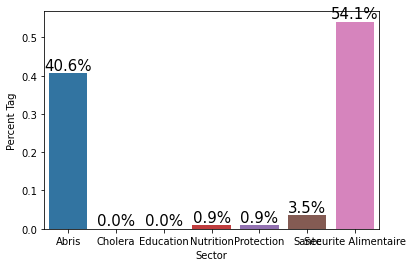

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Petit Trou de Nippes,Abris,3228.00,1764.00,1464.00,1248.00,1774.00,206.00,0.31,0.12,0.17,0.02
Petit Trou de Nippes,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petit Trou de Nippes,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petit Trou de Nippes,Nutrition,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Petit Trou de Nippes,Protection,70.00,35.00,35.00,22.00,48.00,0.00,0.01,0.00,0.00,0.00
Petit Trou de Nippes,Sante,248.00,70.00,178.00,140.00,106.00,2.00,0.02,0.01,0.01,0.00
Petit Trou de Nippes,Securite Alimentaire,6973.00,3493.00,3479.00,3417.00,3110.00,446.26,0.66,0.32,0.30,0.04


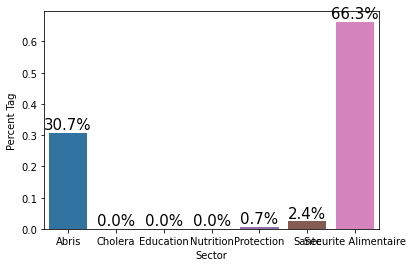

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
L'Asile,Abris,284.00,148.00,136.00,108.00,158.00,18.00,0.04,0.02,0.02,0.00
L'Asile,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Asile,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Asile,Nutrition,205.00,98.00,107.00,205.00,0.00,0.00,0.03,0.03,0.00,0.00
L'Asile,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L'Asile,Sante,35.00,18.00,17.00,14.00,19.00,2.00,0.00,0.00,0.00,0.00
L'Asile,Securite Alimentaire,6609.00,3311.00,3298.00,3238.00,2948.00,422.99,0.93,0.45,0.41,0.06


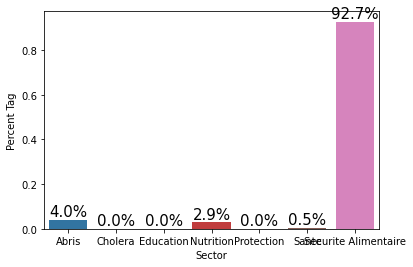

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Arnaud,Abris,1952.00,1030.00,922.00,768.00,1060.00,124.00,0.27,0.11,0.15,0.02
Arnaud,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arnaud,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Arnaud,Nutrition,100.00,48.00,52.00,100.00,0.00,0.00,0.01,0.01,0.00,0.00
Arnaud,Protection,42.00,21.00,21.00,13.00,29.00,0.00,0.01,0.00,0.00,0.00
Arnaud,Sante,439.00,193.00,246.00,197.00,223.00,19.00,0.06,0.03,0.03,0.00
Arnaud,Securite Alimentaire,4690.00,2350.00,2340.00,2298.00,2092.00,300.17,0.65,0.32,0.29,0.04


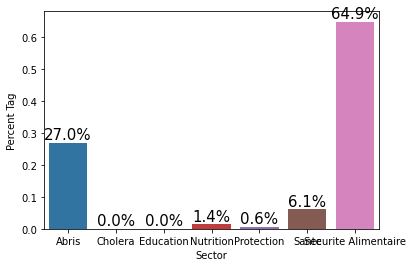

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Plaisance du Sud,Abris,190.00,104.00,86.00,74.00,104.00,12.00,0.11,0.04,0.06,0.01
Plaisance du Sud,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance du Sud,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance du Sud,Nutrition,135.00,65.00,70.00,135.00,0.00,0.00,0.08,0.08,0.00,0.00
Plaisance du Sud,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Plaisance du Sud,Sante,35.00,18.00,17.00,14.00,19.00,2.00,0.02,0.01,0.01,0.00
Plaisance du Sud,Securite Alimentaire,1362.00,682.00,680.00,668.00,608.00,87.18,0.79,0.39,0.35,0.05


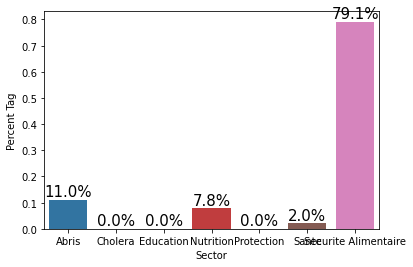

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Baradères,Abris,1900.00,1032.00,868.00,760.00,1018.00,122.00,0.41,0.17,0.22,0.03
Baradères,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baradères,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Baradères,Nutrition,205.00,98.00,107.00,205.00,0.00,0.00,0.04,0.04,0.00,0.00
Baradères,Protection,40.00,20.00,20.00,13.00,27.00,0.00,0.01,0.00,0.01,0.00
Baradères,Sante,384.00,166.00,218.00,176.00,192.00,16.00,0.08,0.04,0.04,0.00
Baradères,Securite Alimentaire,2062.00,1033.00,1029.00,1011.00,920.00,131.98,0.45,0.22,0.20,0.03


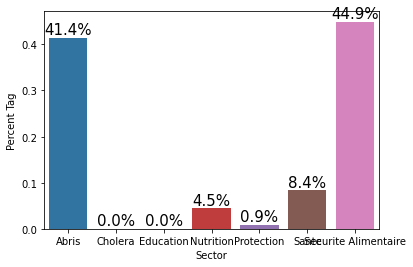

,Sector,People Targeted,Male,Female,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Percent Tag,percent Child,percent Adults,Percent Elderly
Commune,,,,,,,,,,,
Grand-Boucan,Abris,40.00,22.00,18.00,18.00,20.00,2.00,0.02,0.01,0.01,0.00
Grand-Boucan,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand-Boucan,Education,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand-Boucan,Nutrition,30.00,14.00,16.00,30.00,0.00,0.00,0.01,0.01,0.00,0.00
Grand-Boucan,Protection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand-Boucan,Sante,18.00,9.00,9.00,7.00,10.00,1.00,0.01,0.00,0.00,0.00
Grand-Boucan,Securite Alimentaire,2035.00,1020.00,1016.00,997.00,908.00,130.26,0.96,0.47,0.43,0.06


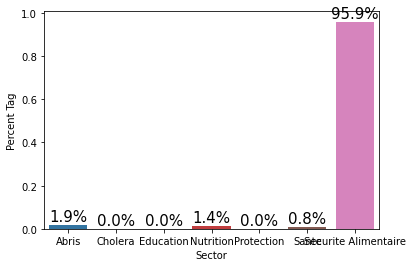

In [46]:
for i  in list_Com :
    art = a[a.index == i][['Sector','People Targeted','Male','Female','Children (<18 ans)','Adults (18-59 ans)','Elderly (>59 ans)']] 
    art['Percent Tag'] = art['People Targeted'] / (art['People Targeted'].sum())
    art['percent Child'] = art['Children (<18 ans)'] / (art['People Targeted'].sum())
    art['percent Adults'] = art['Adults (18-59 ans)'] / (art['People Targeted'].sum())
    art['Percent Elderly'] = art['Elderly (>59 ans)'] / (art['People Targeted'].sum())
    display(art)
    ax = sns.barplot(data= art, x = 'Sector', y = 'Percent Tag')
    for bar in ax.patches:
        ax.annotate('{:.1f}%'.format(bar.get_height()*100),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
    plt.show()

In [105]:
art = z[z.index == 'Artibonite'][['Sector','People Targeted']]

In [108]:
art['v'] = art['People Targeted'] / (art['People Targeted'].sum())
art

,Sector,People Targeted,v
Département,,,
Artibonite,Abris,137180.00,0.43
Artibonite,Cholera,96620.00,0.30
Artibonite,Education,9665.00,0.03
Artibonite,Nutrition,2670.00,0.01
Artibonite,Protection,340.00,0.00
Artibonite,Sante,5629.00,0.02
Artibonite,Securite Alimentaire,65606.00,0.21


<AxesSubplot:xlabel='Sector', ylabel='v'>

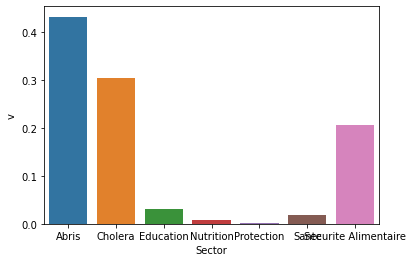

In [109]:
sns.barplot(data= art, x = 'Sector', y = 'v')

In [37]:
# Descriptive of numeric variable
peopleinneed.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
People Targeted,1120.00,2143.13,6071.84,0.00,0.00,105.83,1644.00,78410.96
Female,1120.00,1086.41,3040.94,0.00,0.00,52.00,845.41,39127.07
Male,1120.00,1056.72,3036.30,0.00,0.00,55.03,779.00,39283.89
Children (<18 ans),1120.00,1036.55,2920.68,0.00,0.00,53.00,757.70,38421.37
Adults (18-59 ans),840.00,1309.82,3259.42,0.00,0.00,209.00,1181.00,34971.29


array([[<AxesSubplot:title={'center':'People Targeted'}>,
        <AxesSubplot:title={'center':'Female'}>],
       [<AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Children (<18 ans)'}>],
       [<AxesSubplot:title={'center':'Adults (18-59 ans)'}>,
        <AxesSubplot:>]], dtype=object)

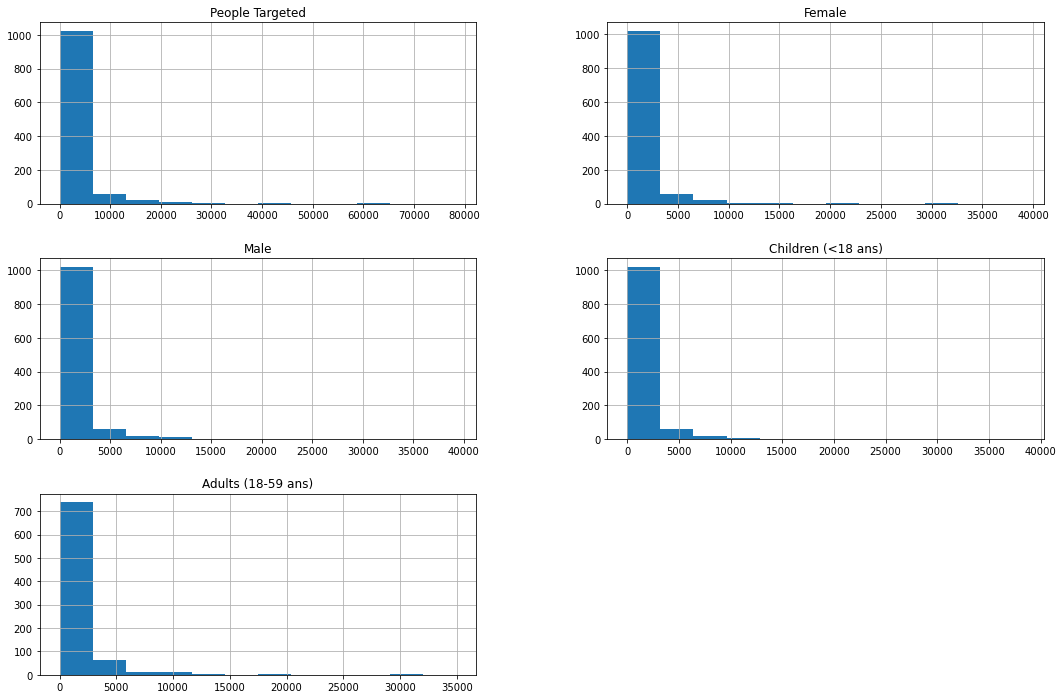

In [132]:
# Let's plot numeric variable
peopleinneedgood.hist(figsize = (18,12), bins=12)

In [52]:
#Correlation of variables
corr = peopleinneedgood.corr()
corr

,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
People Targeted,1.00,1.00,1.00,0.98,0.98,0.99
Female,1.00,1.00,1.00,0.98,0.98,0.98
Male,1.00,1.00,1.00,0.98,0.98,0.99
Children (<18 ans),0.98,0.98,0.98,1.00,0.93,0.94
Adults (18-59 ans),0.98,0.98,0.98,0.93,1.00,0.99
Elderly (>59 ans),0.99,0.98,0.99,0.94,0.99,1.00


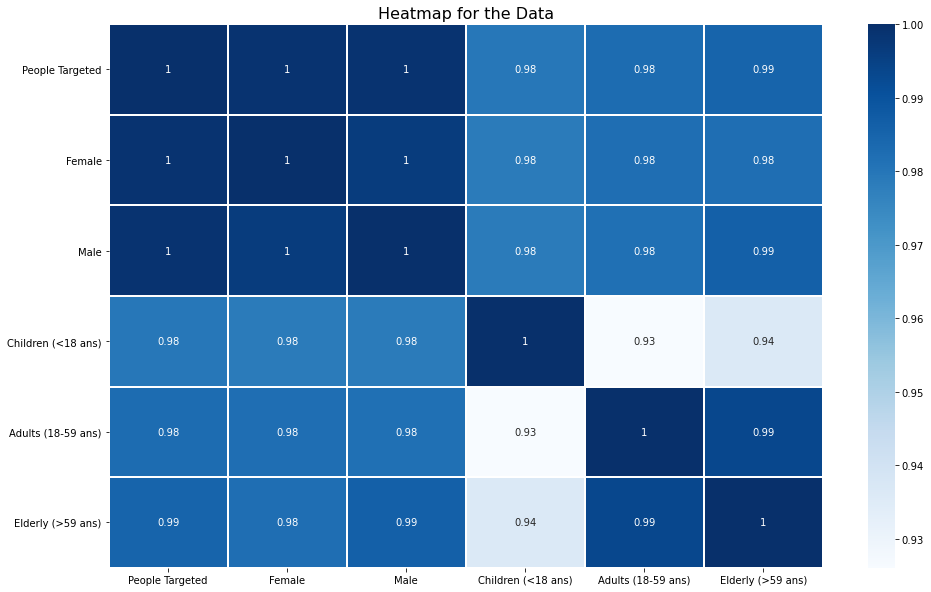

In [53]:

# Heatmap for visualization
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="Blues", cbar=True, 
            annot=True, linecolor='white', 
            linewidths=1) 
plt.title('Heatmap for the Data', fontsize = 16)
plt.show()

# Marchine learning

In [65]:
peopleinneed1 = peopleinneedgood.drop('Admin1_Pcode', axis=1)
peopleinneed1.head(1)

,Département,Commune,Admin2_Pcode,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,Port-au-Prince,HT0111,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60


In [67]:
peopleinneed2 = peopleinneed1.drop('Admin2_Pcode', axis=1)
peopleinneed2.head(1)

,Département,Commune,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
0,Ouest,Port-au-Prince,Securite Alimentaire,7244.00,3615.00,3629.00,3549.00,3231.00,463.60


In [71]:
from sklearn.cluster import KMeans 

In [73]:
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [69]:
from sklearn.preprocessing import StandardScaler
X = a.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.66287225,  0.59729736,  0.7280817 ,  0.59353369,  0.70272278,
         0.69757789],
       [-0.33048321, -0.33310472, -0.32732112, -0.34309282, -0.31143008,
        -0.3000309 ],
       [-0.33048321, -0.33310472, -0.32732112, -0.34309282, -0.31143008,
        -0.3000309 ],
       ...,
       [-0.31860936, -0.32130031, -0.31539567, -0.33469388, -0.29506383,
        -0.3000309 ],
       [-0.25802574, -0.22632847, -0.28964752, -0.25070449, -0.25095817,
        -0.3000309 ],
       [-0.12269085, -0.12706412, -0.11835462, -0.12443078, -0.12086033,
        -0.09173018]])

In [72]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 2 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 

In [74]:
a["Clus_km"] = labels
a.head(5)

,Sector,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans),Clus_km
Commune,,,,,,,,
Abricots,Abris,7362.00,3468.00,3894.00,3234.00,3656.00,472.00,0
Abricots,Cholera,0.00,0.00,0.00,0.00,0.00,0.00,0
Abricots,Education,0.00,0.00,0.00,0.00,0.00,0.00,0
Abricots,Nutrition,175.00,91.00,84.00,175.00,0.00,0.00,0
Abricots,Protection,166.00,83.00,83.00,55.00,111.00,0.00,0


In [75]:
a.groupby('Clus_km').mean()

,People Targeted,Female,Male,Children (<18 ans),Adults (18-59 ans),Elderly (>59 ans)
Clus_km,,,,,,
0,942.06,493.24,448.82,466.74,426.40,48.92
1,62246.00,31411.12,30834.88,28880.12,29381.62,3984.16
2,16603.24,8208.59,8394.70,8025.95,7580.83,996.46


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

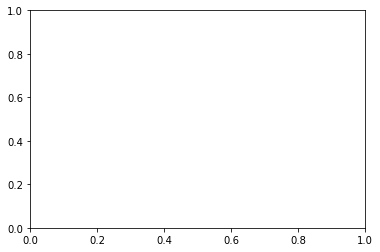

In [78]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Commune', fontsize=18)
plt.ylabel('Sector', fontsize=16)

plt.show()

#**CONCLUSION AND RECOMMANDATIONS**